In [1]:
#!/usr/bin/env python3
#pip install  rioxarray==0.3.1
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import rioxarray
import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs
import rasterio
import os
import matplotlib.colors
scriptsdir = os.getcwd()
from scipy.interpolate import griddata
from functools import reduce
import xarray
import itertools
import argparse
import matplotlib.colors as mcolors
import warnings
import cartopy.feature as cfeature

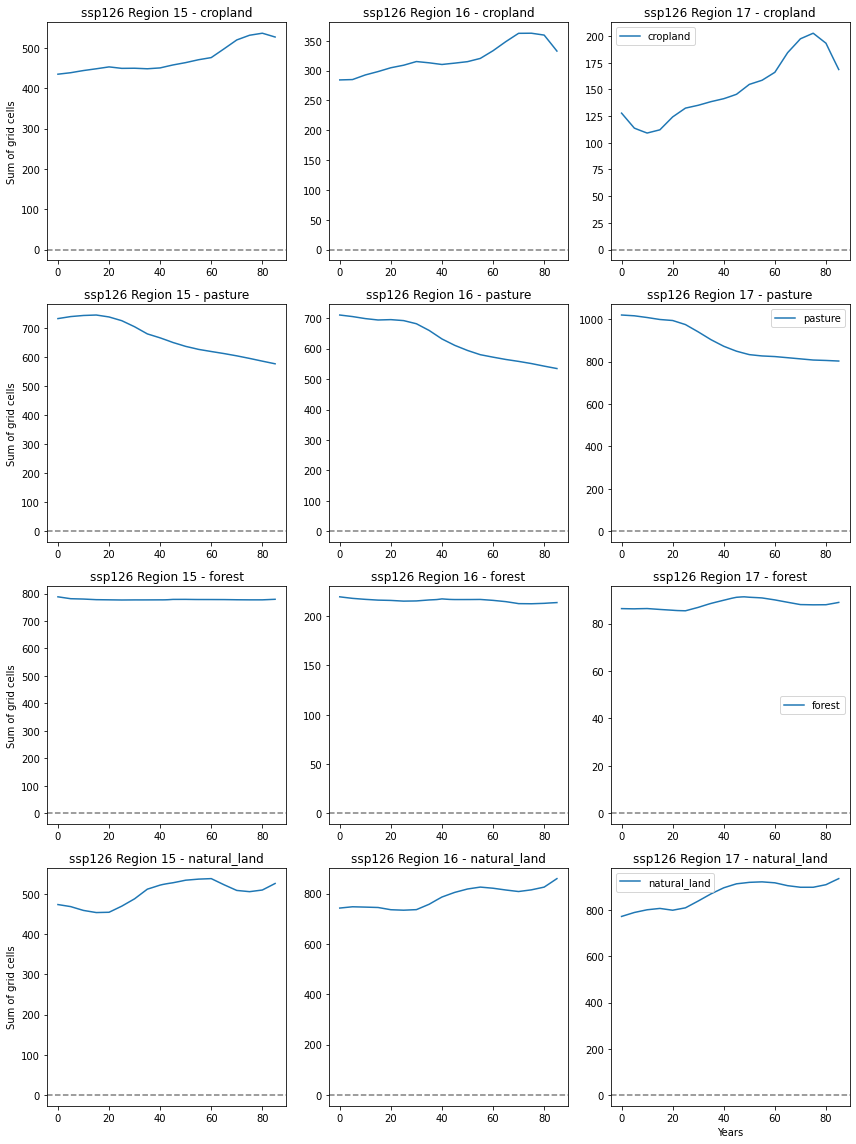

In [9]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

region_numbers = [15, 16, 17]

# Define categories
category_mapping = {
    'cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'pasture': ['pastr', 'range'],
    'forest': ['primf', 'secdf'],
    'natural_land': ['primn', 'secdn']
}

# Load the land use dataset for the specified regions
num_regions = len(region_numbers)
num_categories = len(category_mapping.keys())
fig, axes = plt.subplots(nrows=num_categories, ncols=num_regions, figsize=(4*num_regions, 4*num_categories))

for i, region_number in enumerate(region_numbers):
    # Load the land use dataset
    da_landuse = xr.open_dataset(f"/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126_region{region_number}.nc", decode_times=False)
    # Get the time values
    time = da_landuse['time'].values
    
    # Initialize a new dataset for sum over categories
    sum_over_categories = xr.Dataset()

    # Sum the categories for the land use dataset
    for category, vars_in_category in category_mapping.items():
        sum_over_categories[category] = sum(da_landuse[var] for var in vars_in_category)

    # Loop over the categories
    for j, category in enumerate(sum_over_categories.data_vars):
        # Get the sum of values for the current category
        values = sum_over_categories[category].sum(dim=['lat', 'lon']).values

        # Plot the sum values for the current category in the corresponding subplot
        ax = axes[j, i]
        ax.plot(time, values, label=category)

        # Set the y-axis label for the leftmost subplots
        if i == 0:
            ax.set_ylabel('Sum of grid cells')

        # Add a horizontal line at y=0.0
        ax.axhline(y=0.0, color='grey', linestyle='--')

        # Set the title with region number and category name
        region_name = region_numbers[i]
        ax.set_title(f'ssp126 Region {region_name} - {category}')

        # Add a legend to the last column subplots
        if i == num_regions - 1:
            ax.legend()

    # Set the x-axis label for the bottom subplots
    if i == num_regions - 1:
        axes[-1, i].set_xlabel('Years')

# Adjust the layout to display plots neatly
plt.tight_layout()

# Display the plots
plt.show()


TypeError: unsupported operand type(s) for +: 'int' and 'method'

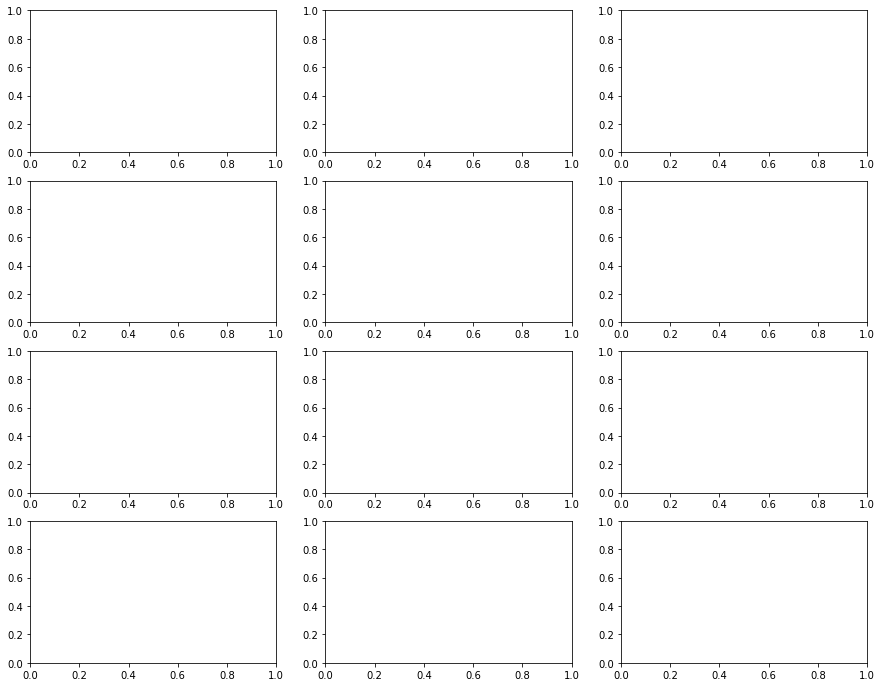

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

# Region numbers
region_numbers = [15, 16, 17]

# Years for which to plot data
years_to_plot = [35, 65, 85]

# Category mapping
category_mapping = {
    'cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'pasture': ['pastr', 'range'],
    'forest': ['primf', 'secdf'],
    'natural_land': ['primn', 'secdn']
}

# Create plot
fig, axes = plt.subplots(nrows=len(category_mapping), ncols=len(region_numbers), figsize=(15, 12))
num_categories = len(category_mapping)

for i, region_number in enumerate(region_numbers):
    # Load land use dataset for region
    da_landuse = xr.open_dataset(f"/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126_region{region_number}.nc", decode_times=False)

    # Select only the required years
    da_landuse = da_landuse.sel(time=years_to_plot)

    # Loop over categories
    for j, (category, vars_in_category) in enumerate(category_mapping.items()):
        # Calculate the number of grid cells per category and year
        grid_counts = (da_landuse[vars_in_category] > 0).sum(dim=['lat', 'lon']).values

        # Plot a bar chart for each year
        ax = axes[j, i]
        ax.bar(years_to_plot, grid_counts)
        ax.set_title(f'ssp126 Region {region_number} - {category}')
        ax.set_xlabel('Year')
        ax.set_ylabel('Number of Grid Cells')

# Adjust the layout to display plots neatly
plt.tight_layout()

# Show plot
plt.show()


In [5]:
grid_counts

<bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Coordinates:
    region   int64 ...
    abbrevs  object ...
    names    object ...
Data variables:
    c3ann    int64 7214
    c3per    int64 7207
    c4ann    int64 7196
    c4per    int64 6431
    c3nfx    int64 7190>

TypeError: cannot directly convert an xarray.Dataset into a numpy array. Instead, create an xarray.DataArray first, either with indexing on the Dataset or by invoking the `to_array()` method.

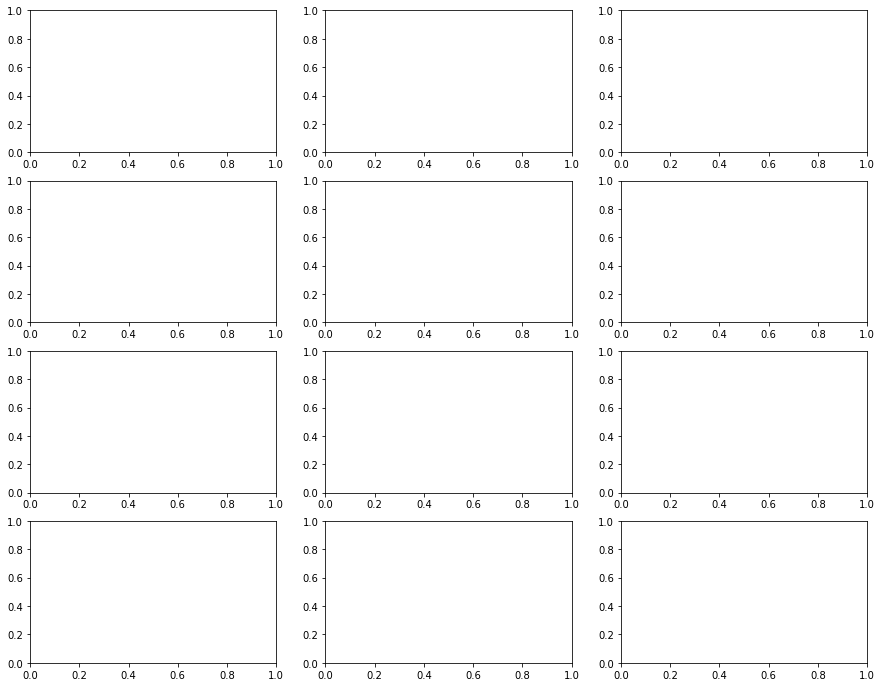

In [6]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

# Region numbers
region_numbers = [15, 16, 17]

# Years for which to plot data
years_to_plot = [35, 65, 85]

# Category mapping
category_mapping = {
    'cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'pasture': ['pastr', 'range'],
    'forest': ['primf', 'secdf'],
    'natural_land': ['primn', 'secdn']
}

# Create plot
fig, axes = plt.subplots(nrows=len(category_mapping), ncols=len(region_numbers), figsize=(15, 12))
num_categories = len(category_mapping)

for i, region_number in enumerate(region_numbers):
    # Load land use dataset for region
    da_landuse = xr.open_dataset(f"/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126_region{region_number}.nc", decode_times=False)

    # Select only the required years
    da_landuse = da_landuse.sel(time=years_to_plot)

    # Loop over categories
    for j, (category, vars_in_category) in enumerate(category_mapping.items()):
        # Calculate the number of grid cells per category and year
        grid_counts = (da_landuse[vars_in_category] > 0).sum(dim=['lat', 'lon'])
        grid_counts_values = grid_counts.values


        # Plot a bar chart for each category
        ax = axes[j, i]
        ax.bar(years_to_plot, grid_counts, width=0.2)  # Adjust width as needed
        ax.set_title(f'ssp126 Region {region_number} - {category}')
        ax.set_xlabel('Year')
        ax.set_ylabel('Number of Grid Cells')

# Adjust the layout to display plots neatly
plt.tight_layout()

# Show plot
plt.show()


TypeError: unsupported operand type(s) for /: 'method' and 'float'

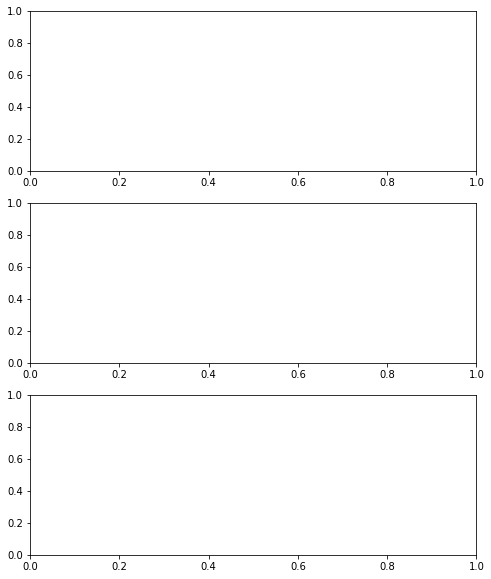

In [13]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

# Region abbreviations and their corresponding numbers
region_mapping = {'WAF': 15, 'EAF': 16, 'SAF': 17}

# Years for which to plot data
years_to_plot = [35, 65, 85]

# Category mapping
category_mapping = {
    'cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'pasture': ['pastr', 'range'],
    'forest': ['primf', 'secdf'],
    'natural_land': ['primn', 'secdn']
}

# Create plot
fig, axes = plt.subplots(nrows=len(region_mapping), ncols=1, figsize=(8, 10))
explode = [0.1, 0.1, 0.1, 0.1]  # Explode the slices for better visibility

for i, (region_abbrev, region_number) in enumerate(region_mapping.items()):
    # Load land use dataset for region
    da_landuse = xr.open_dataset(f"/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126_region{region_number}.nc", decode_times=False)

    # Select only the required years
    da_landuse = da_landuse.sel(time=years_to_plot)

    # Calculate the total number of grid cells for the region
    total_grid_cells = da_landuse['lat'].size * da_landuse['lon'].size

    # Create an empty list to store percentages
    percentages = []

    # Calculate the percentage of grid cells for each category within the region
    for category, vars_in_category in category_mapping.items():
        grid_counts = (da_landuse[vars_in_category] > 0).sum(dim=['lat', 'lon']).values
        percentage = (grid_counts / float(total_grid_cells)) * 100  # Corrected the type of total_grid_cells
        percentages.append(percentage)

    # Convert the percentages list to a numpy array with the same shape
    max_length = max(len(p) for p in percentages)
    percentages_array = np.array([p + [0] * (max_length - len(p)) for p in percentages])

    # Create a pie chart for the region
    ax = axes[i]
    ax.pie(percentages_array, explode=explode, labels=category_mapping.keys(), autopct='%1.1f%%', startangle=90)
    ax.set_title(f'ssp126 Region {region_number}')

# Adjust the layout to display plots neatly
plt.tight_layout()

# Show plot
plt.show()


In [4]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

# Region abbreviations

region_numbers = [15, 16, 17]

# Years for which to plot data
years_to_plot = [35, 65, 85]

# Category mapping
category_mapping = {
    'cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'pasture': ['pastr', 'range'],
    'forest': ['primf', 'secdf'],
    'natural_land': ['primn', 'secdn']
}

# Create plot
fig, ax = plt.subplots(nrows=1, ncols=len(region_abbrevs), figsize=(15, 5))
num_regions = len(region_numbers)
for i, region_number in enumerate(region_numbers):
    # Load land use dataset for region
    da_landuse = xr.open_dataset(f"/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126_region{region_number}.nc", decode_times=False)

    # Select only the required years
    da_landuse = da_landuse.sel(time=years_to_plot)

    # Create a new dataset for sum over categories
    sum_over_categories = xr.Dataset()

    # Count the number of grid cells per category and year
    for category, vars_in_category in category_mapping.items():
        sum_over_categories[category] = (sum(da_landuse[var] > 0 for var in vars_in_category)).astype(int)

    # Calculate the grid cell counts per category and year
    grid_counts = {category: sum_over_categories[category].sum(dim=['lat', 'lon']).values for category in sum_over_categories.data_vars}

    # Plot a stacked bar chart for each category and year
    bottom = np.zeros(len(years_to_plot))
    for category, counts in grid_counts.items():
        ax[i].bar(years_to_plot, counts, label=category, bottom=bottom)
        bottom += counts  # increment the bottom location by the counts just plotted
    region_name = region_numbers[i]
    # Set title and labels
    ax[i].set_title(f'ssp126 Region {region_name}')
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Number of Grid Cells')

    # Add legend
    ax[i].legend(loc='upper right')

# Adjust the layout to display plots neatly
plt.tight_layout()

# Show plot
plt.show()


NameError: name 'region_abbrevs' is not defined

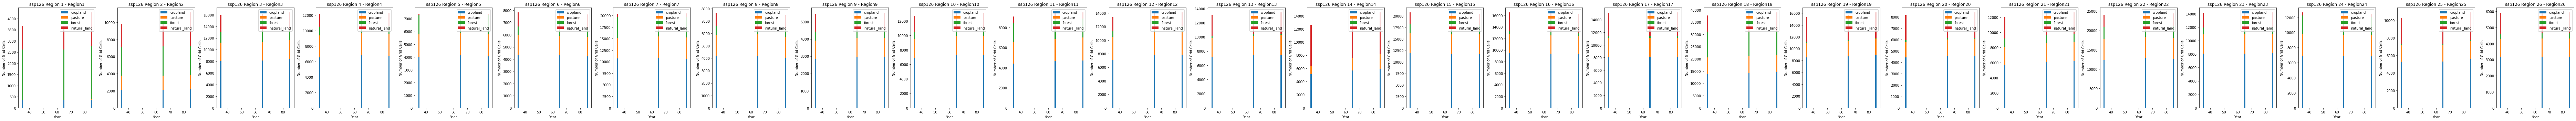

In [5]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

# Region abbreviations and their corresponding numbers
region_mapping = {
    'Region1': 1,
    'Region2': 2,
    'Region3': 3,
    'Region4': 4,
    'Region5': 5,
    'Region6': 6,
    'Region7': 7,
    'Region8': 8,
    'Region9': 9,
    'Region10': 10,
    'Region11': 11,
    'Region12': 12,
    'Region13': 13,
    'Region14': 14,
    'Region15': 15,
    'Region16': 16,
    'Region17': 17,
    'Region18': 18,
    'Region19': 19,
    'Region20': 20,
    'Region21': 21,
    'Region22': 22,
    'Region23': 23,
    'Region24': 24,
    'Region25': 25,
    'Region26': 26,
}


# Years for which to plot data
years_to_plot = [35, 65, 85]

# Category mapping
category_mapping = {
    'cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'pasture': ['pastr', 'range'],
    'forest': ['primf', 'secdf'],
    'natural_land': ['primn', 'secdn']
}

# Create plot
num_regions = len(region_mapping)
fig, ax = plt.subplots(nrows=1, ncols=num_regions, figsize=(4*num_regions, 5))

for i, (region_abbrev, region_number) in enumerate(region_mapping.items()):
    # Load land use dataset for region
    da_landuse = xr.open_dataset(f"/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126_region{region_number}.nc", decode_times=False)

    # Select only the required years
    da_landuse = da_landuse.sel(time=years_to_plot)

    # Create a new dataset for sum over categories
    sum_over_categories = xr.Dataset()

    # Count the number of grid cells per category and year
    for category, vars_in_category in category_mapping.items():
        sum_over_categories[category] = (sum(da_landuse[var] > 0 for var in vars_in_category)).astype(int)

    # Calculate the grid cell counts per category and year
    grid_counts = {category: sum_over_categories[category].sum(dim=['lat', 'lon']).values for category in sum_over_categories.data_vars}

    # Plot a stacked bar chart for each category and year
    bottom = np.zeros(len(years_to_plot))
    for category, counts in grid_counts.items():
        ax[i].bar(years_to_plot, counts, label=category, bottom=bottom)
        bottom += counts  # increment the bottom location by the counts just plotted

    # Set title and labels
    ax[i].set_title(f'ssp126 Region {region_number} - {region_abbrev}')
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Number of Grid Cells')

    # Add legend
    ax[i].legend(loc='upper right')

# Adjust the layout to display plots neatly
plt.tight_layout()

# Show plot
plt.show()


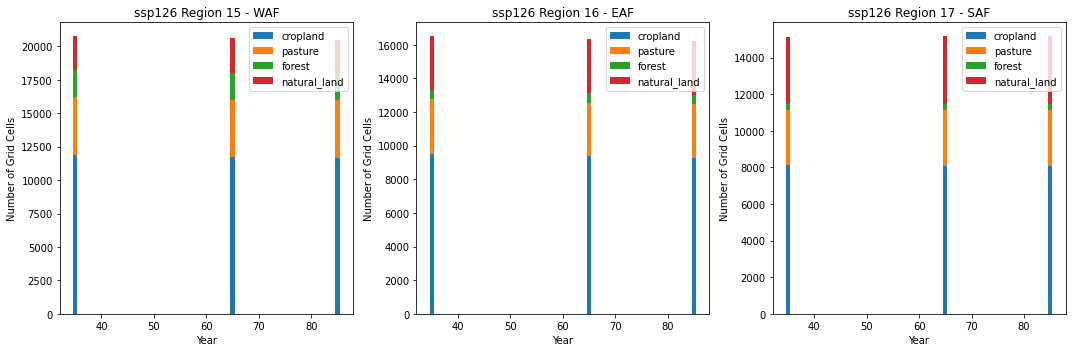

In [14]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

# Region abbreviations and their corresponding numbers
region_mapping = {'WAF': 15, 'EAF': 16, 'SAF': 17}

# Years for which to plot data
years_to_plot = [35, 65, 85]

# Category mapping
category_mapping = {
    'cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'pasture': ['pastr', 'range'],
    'forest': ['primf', 'secdf'],
    'natural_land': ['primn', 'secdn']
}

# Create plot
fig, ax = plt.subplots(nrows=1, ncols=len(region_mapping), figsize=(15, 5))

for i, (region_abbrev, region_number) in enumerate(region_mapping.items()):
    # Load land use dataset for region
    da_landuse = xr.open_dataset(f"/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126_region{region_number}.nc", decode_times=False)

    # Select only the required years
    da_landuse = da_landuse.sel(time=years_to_plot)

    # Create a new dataset for sum over categories
    sum_over_categories = xr.Dataset()

    # Count the number of grid cells per category and year
    for category, vars_in_category in category_mapping.items():
        sum_over_categories[category] = (sum(da_landuse[var] > 0 for var in vars_in_category)).astype(int)

    # Calculate the grid cell counts per category and year
    grid_counts = {category: sum_over_categories[category].sum(dim=['lat', 'lon']).values for category in sum_over_categories.data_vars}

    # Plot a stacked bar chart for each category and year
    bottom = np.zeros(len(years_to_plot))
    for category, counts in grid_counts.items():
        ax[i].bar(years_to_plot, counts, label=category, bottom=bottom)
        bottom += counts  # increment the bottom location by the counts just plotted

    # Set title and labels
    ax[i].set_title(f'ssp126 Region {region_number} - {region_abbrev}')
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Number of Grid Cells')

    # Add legend
    ax[i].legend(loc='upper right')

# Adjust the layout to display plots neatly
plt.tight_layout()

# Show plot
plt.show()


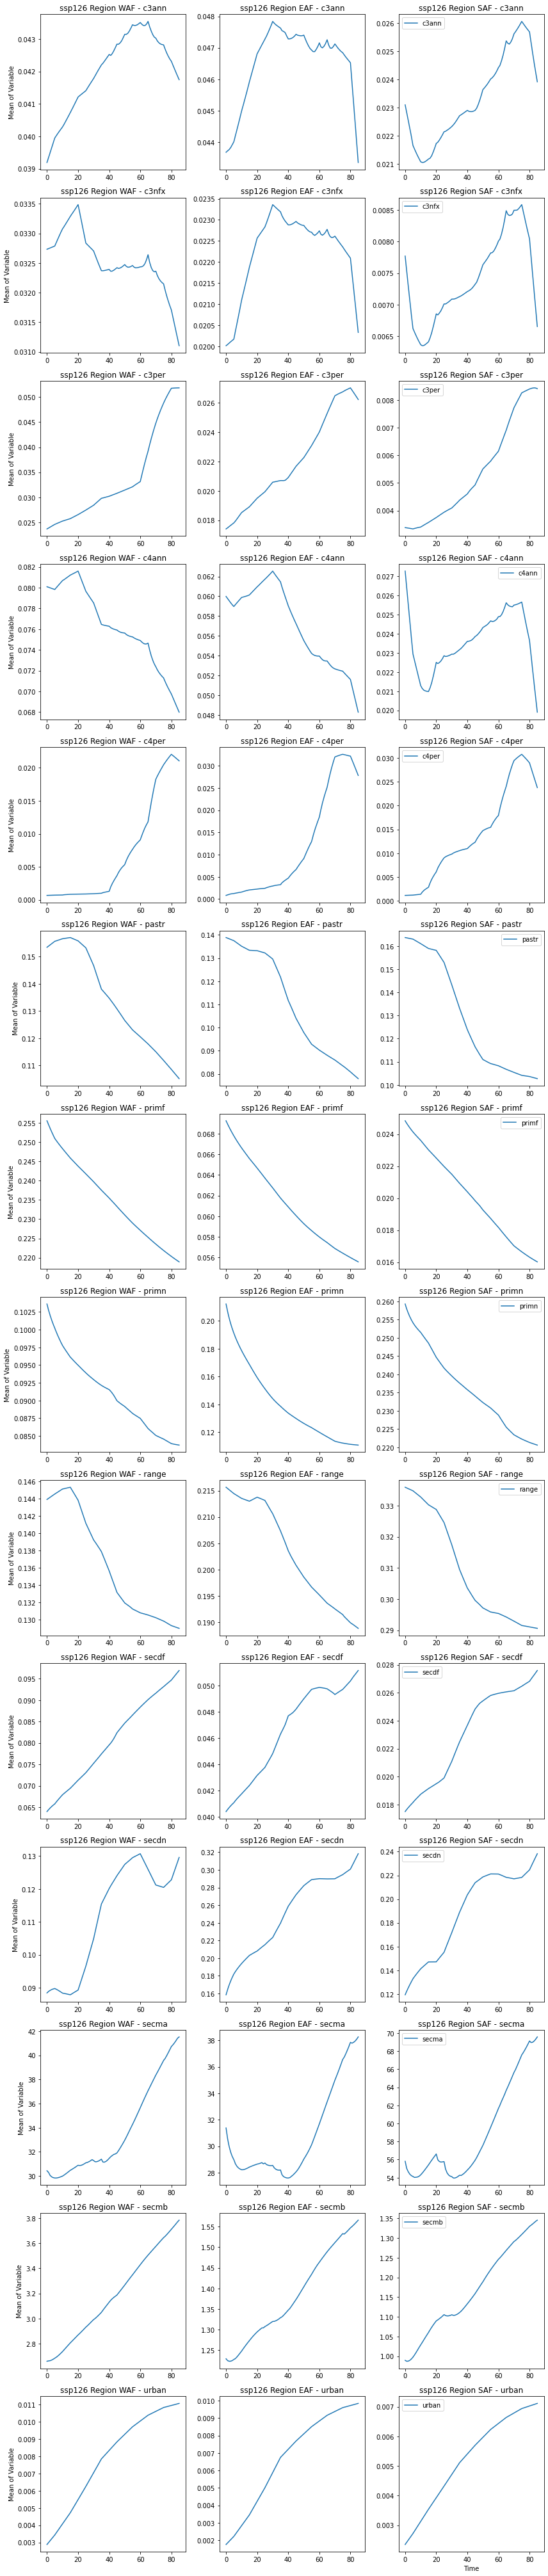

In [16]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

region_abbrevs = ['WAF', 'EAF', 'SAF']

# Load the land use dataset for the specified regions
regions = [region_abbrevs.index(region)+15 for region in region_abbrevs]
num_regions = len(regions)
variable_names = [var for var in da_landuse.data_vars.keys() if var != 'time_bnds']
num_variables = len(variable_names)
fig, axes = plt.subplots(nrows=num_variables, ncols=num_regions, figsize=(4*num_regions, 4*num_variables))

for i, region_number in enumerate(regions):
    # Load the land use dataset
    da_landuse = xr.open_dataset(f"/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126_region{region_number}.nc", decode_times=False)

    # Loop over the variables
    for j, variable in enumerate(variable_names):
        # Get the mean values per timestep for the current variable and region
        mean_values = da_landuse[variable].mean(dim=['lat', 'lon']).values
        time = da_landuse['time'].values

        # Plot the mean values for the current variable in the corresponding subplot
        ax = axes[j, i]
        ax.plot(time, mean_values, label=variable)

        # Set the y-axis label for the leftmost subplots
        if i == 0:
            ax.set_ylabel('Mean of Variable')

        # Set the title with region number and variable name
        region_name = region_abbrevs[i]
        ax.set_title(f'ssp126 Region {region_name} - {variable}')

        # Add a legend to the last column subplots
        if i == num_regions - 1:
            ax.legend()

    # Set the x-axis label for the bottom subplots
    if i == num_regions - 1:
        axes[-1, i].set_xlabel('Time')

# Adjust the layout to display plots neatly
plt.tight_layout()

# Display the plots
plt.show()


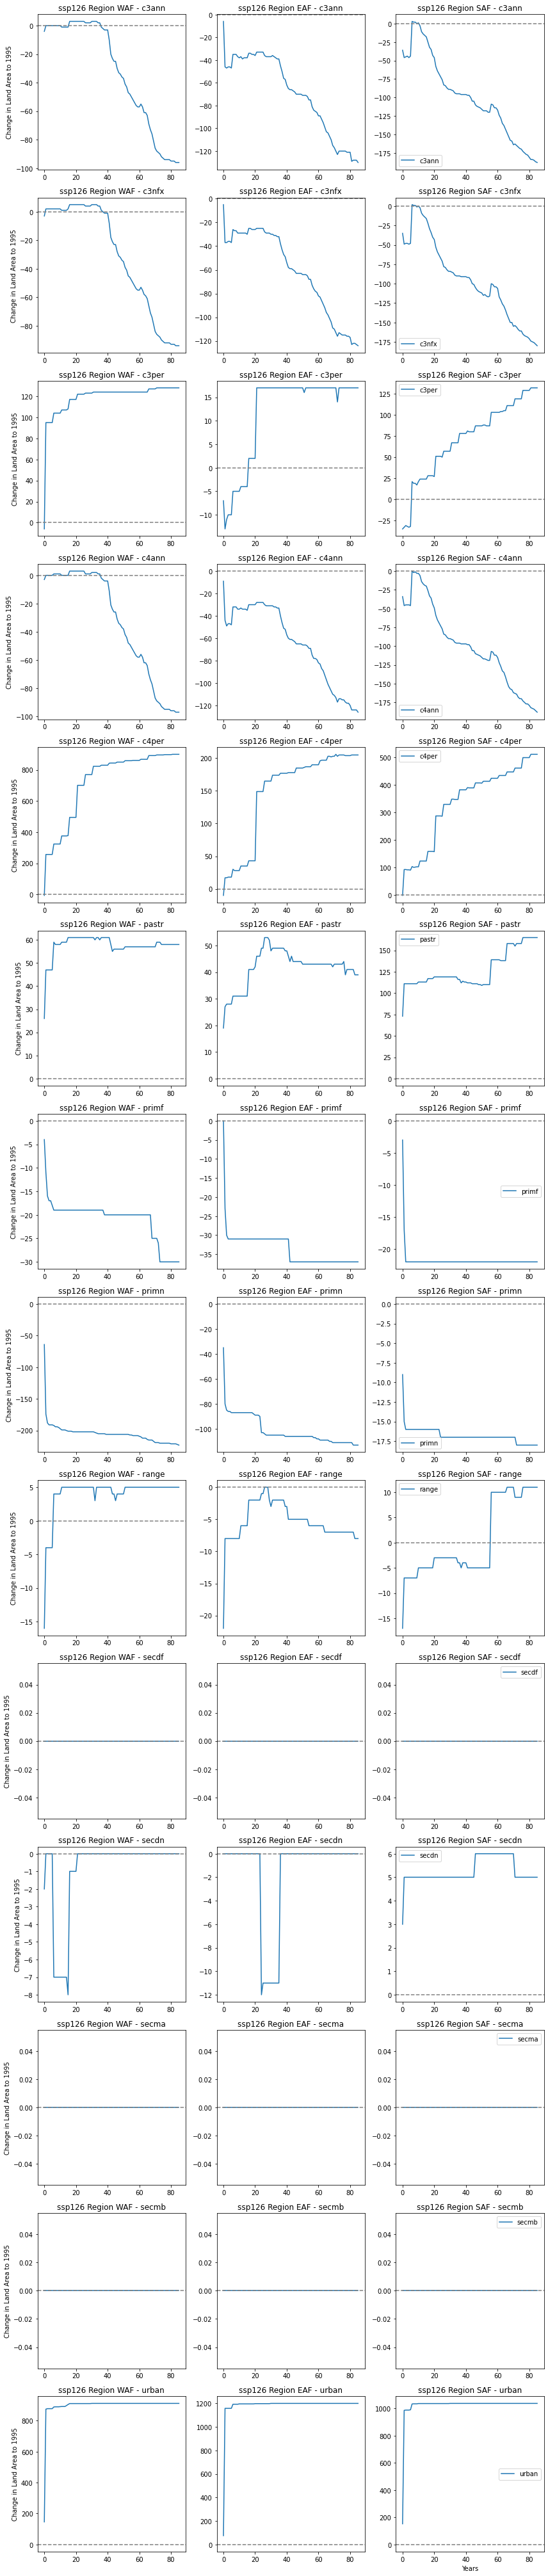

In [17]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

region_abbrevs = ['WAF', 'EAF', 'SAF']

# Load the land use dataset for the specified regions
regions = [region_abbrevs.index(region)+15 for region in region_abbrevs]
num_regions = len(regions)
num_variables = len(variable_names)
fig, axes = plt.subplots(nrows=num_variables, ncols=num_regions, figsize=(4*num_regions, 4*num_variables))

for i, region_number in enumerate(regions):
    da_historic = xr.open_dataset(f"/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_historical_region{region_number}.nc", decode_times=False)
    da_historic = da_historic.isel(time=1146)

    # Initialize a dataset to store the sums for the historical dataset
    modified_landuse_historic = da_historic.copy()

    # Loop over the data variables and check if the fraction is larger than 0
    variable_names = [var for var in modified_landuse_historic.data_vars.keys() if var != 'time_bnds']
    for variable in variable_names:
        fraction = da_historic[variable]
        modified_landuse_historic[variable] = xr.where(fraction > 0, 1, 0)

    # Calculate the sum of values for each variable
    sum_over_values_historic = modified_landuse_historic.sum(dim=[dim for dim in modified_landuse_historic.dims if dim != 'time'])

    # Load the land use dataset
    da_landuse = xr.open_dataset(f"/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126_region{region_number}.nc", decode_times=False)
    # Get the time values
    time = da_landuse['time'].values

    # Initialize the modified land use dataset
    modified_landuse = da_landuse.copy()

    # Loop over the data variables and check if the fraction is larger than 0
    for variable in variable_names:
        fraction = da_landuse[variable]
        modified_landuse[variable] = xr.where(fraction > 0, 1, 0)

    # Calculate the sum of values for each variable
    sum_over_values = modified_landuse.sum(dim=[dim for dim in modified_landuse.dims if dim != 'time'])

    # Loop over the variables
    for j, variable in enumerate(variable_names):
        # Get the difference values for the current variable
        values = sum_over_values[variable].values - sum_over_values_historic[variable].values

        # Plot the difference values for the current variable in the corresponding subplot
        ax = axes[j, i]
        ax.plot(time, values, label=variable)

        # Set the y-axis label for the leftmost subplots
        if i == 0:
            ax.set_ylabel('Change in Land Area to 1995')

        # Add a horizontal line at y=0.0
        ax.axhline(y=0.0, color='grey', linestyle='--')

        # Set the title with region number and variable name
        region_name = region_abbrevs[i]
        ax.set_title(f'ssp126 Region {region_name} - {variable}')

        # Add a legend to the last column subplots
        if i == num_regions - 1:
            ax.legend()

    # Set the x-axis label for the bottom subplots
    if i == num_regions - 1:
        axes[-1, i].set_xlabel('Years')

# Adjust the layout to display plots neatly
plt.tight_layout()

# Display the plots
plt.show()


RuntimeError: NetCDF: HDF error

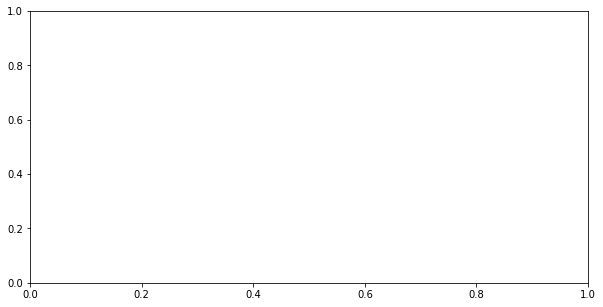

In [25]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

# Region abbreviations and their corresponding numbers
region_mapping = {'WAF': 15, 'EAF': 16, 'SAF': 17}

# Years for which to plot data
years_to_plot = [35, 65, 85]

# Category mapping
category_mapping = {
    'cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'pasture': ['pastr', 'range'],
    'forest': ['primf', 'secdf'],
    'natural_land': ['primn', 'secdn']
}

# Create plot
fig, ax = plt.subplots(figsize=(10, 5))

# Initialize grid cell counts for combined regions
combined_counts = {category: np.zeros(len(years_to_plot)) for category in category_mapping.keys()}

# Loop over regions
for region_abbrev, region_number in region_mapping.items():
    # Load land use dataset for region
    da_landuse = xr.open_dataset(f"/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126_region{region_number}.nc", decode_times=False)

    # Select only the required years
    da_landuse = da_landuse.sel(time=years_to_plot)

    # Create a new dataset for sum over categories
    sum_over_categories = xr.Dataset()

    # Count the number of grid cells per category and year
    for category, vars_in_category in category_mapping.items():
        sum_over_categories[category] = (sum(da_landuse[var] > 0 for var in vars_in_category)).astype(int)

    # Calculate the grid cell counts per category and year
    grid_counts = {category: sum_over_categories[category].sum(dim=['lat', 'lon']).values for category in sum_over_categories.data_vars}

    # Accumulate the counts for the combined regions
    for category, counts in grid_counts.items():
        combined_counts[category] += counts

# Plot a stacked bar chart for each category and year
bottom = np.zeros(len(years_to_plot))
for category, counts in combined_counts.items():
    ax.bar(years_to_plot, counts, label=category, bottom=bottom)
    bottom += counts  # increment the bottom location by the counts just plotted

# Set title and labels
ax.set_title('Combined Land Use - All Regions')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Grid Cells')

# Add legend
ax.legend(loc='upper right')

# Adjust the layout to display plots neatly
plt.tight_layout()

# Show plot
plt.show()


/storage/homefs/ch21o450/.local/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


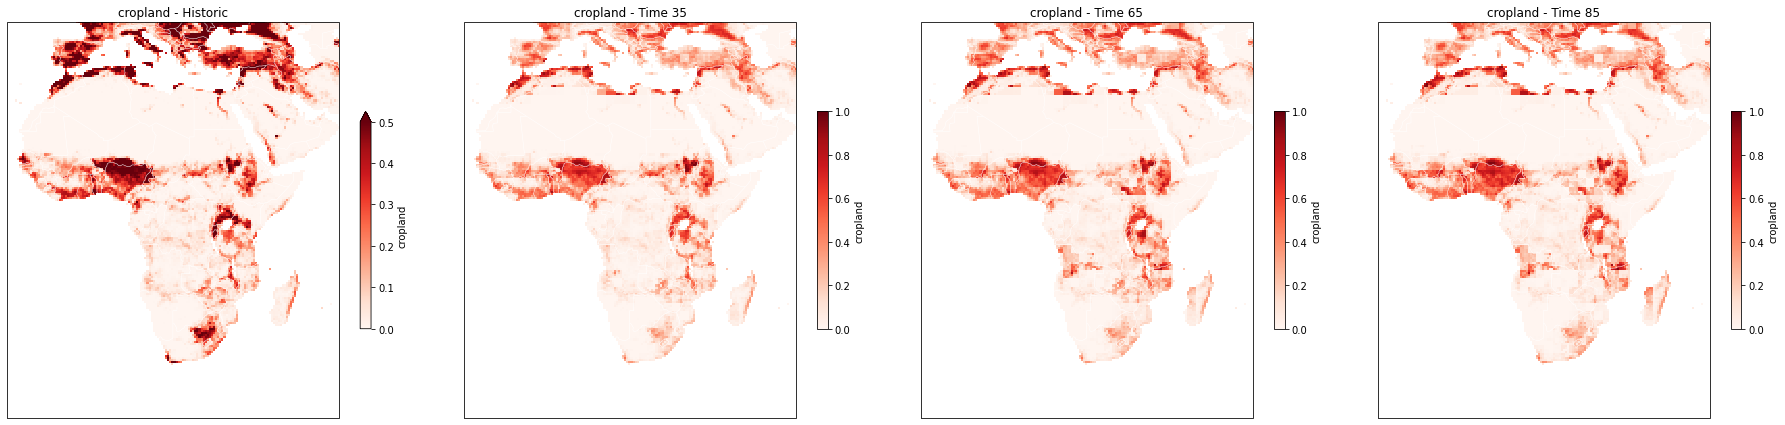

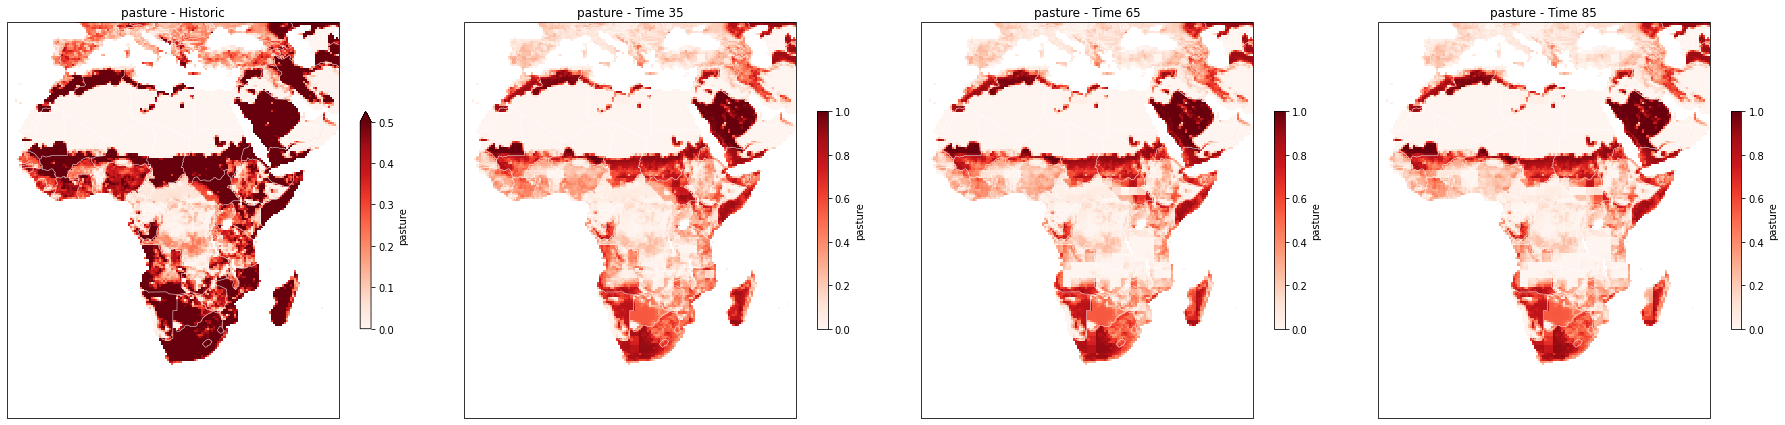

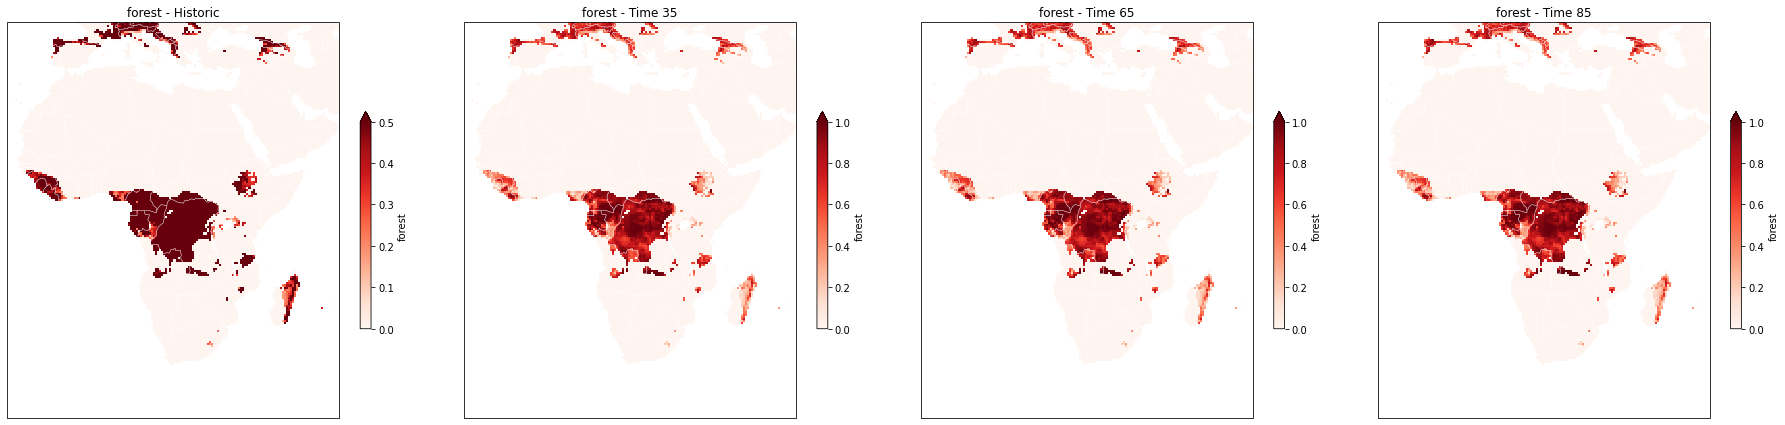

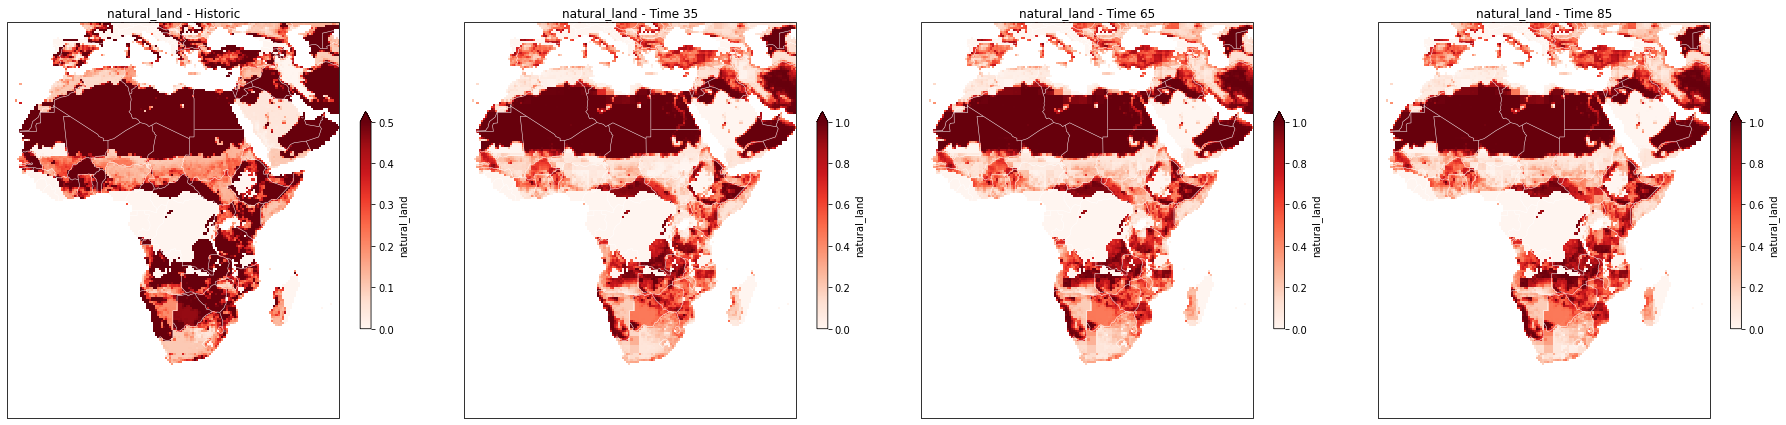

In [18]:
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import xarray as xr

# Future LUH2
LandUseList = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126.nc"
ncfname = LandUseList
da_landuse = xr.open_dataset(ncfname, decode_times=False)
da_landuse = da_landuse.isel(time=[35, 65, 85])

LUH_historic = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_historical.nc"
da_historic = xr.open_dataset(LUH_historic, decode_times=False)
da_historic = da_historic.isel(time=1146)

# Category mapping
category_mapping = {
    'cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'pasture': ['pastr', 'range'],
    'forest': ['primf', 'secdf'],
    'natural_land': ['primn', 'secdn']
}

# Create a new dataset for sum over categories
sum_over_categories = xr.Dataset()

# Sum the categories for both datasets
for category, vars_in_category in category_mapping.items():
    sum_over_categories[category] = sum(da_landuse[var] for var in vars_in_category)
    da_historic[category] = sum(da_historic[var] for var in vars_in_category)

# Time points for future dataset
time_points = [35, 65, 85]

# Plot each category on a lon-lat map
for category in sum_over_categories.data_vars:
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(32, 8), subplot_kw={'projection': ccrs.PlateCarree()})

    # Plot the historic data in the first column
    ax = axes[0]
    im = da_historic[category].plot.imshow(x='lon', y='lat', transform=ccrs.PlateCarree(), cmap='Reds', ax=ax, vmin=0, vmax=0.5, cbar_kwargs={'shrink': 0.5})
    ax.add_feature(cfeature.BORDERS, color='white', linewidth=0.5)
    ax.set_title(f"{category} - Historic")
    ax.set_extent((-20, 60, -40, 40))

    # Plot future data for each selected time point in the remaining columns
    for i, time in enumerate(time_points):
        ax = axes[i+1]
        im = sum_over_categories[category].isel(time=i).plot.imshow(x='lon', y='lat', transform=ccrs.PlateCarree(), cmap='Reds', ax=ax, vmin=0, vmax=1, cbar_kwargs={'shrink': 0.5})
        ax.add_feature(cfeature.BORDERS, color='white', linewidth=0.5)
        ax.set_title(f"{category} - Time {time}")
        ax.set_extent((-20, 60, -40, 40))

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.1)
    
    # Show the plot
    plt.show()


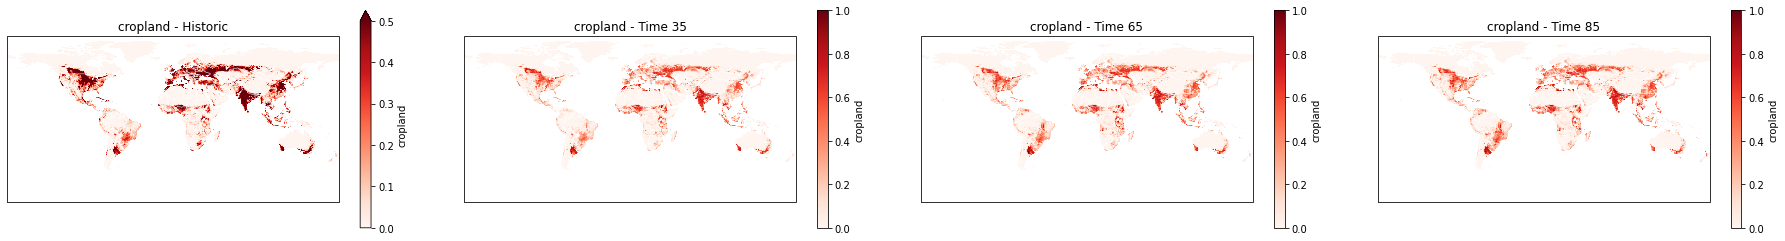

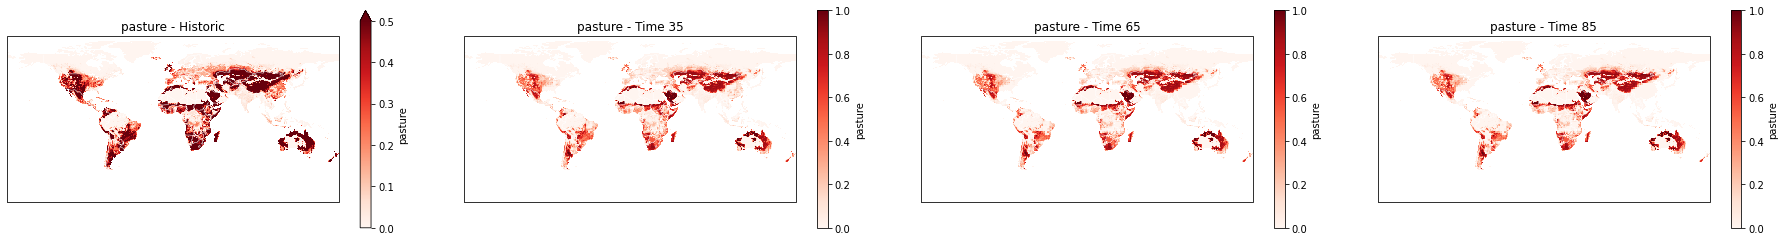

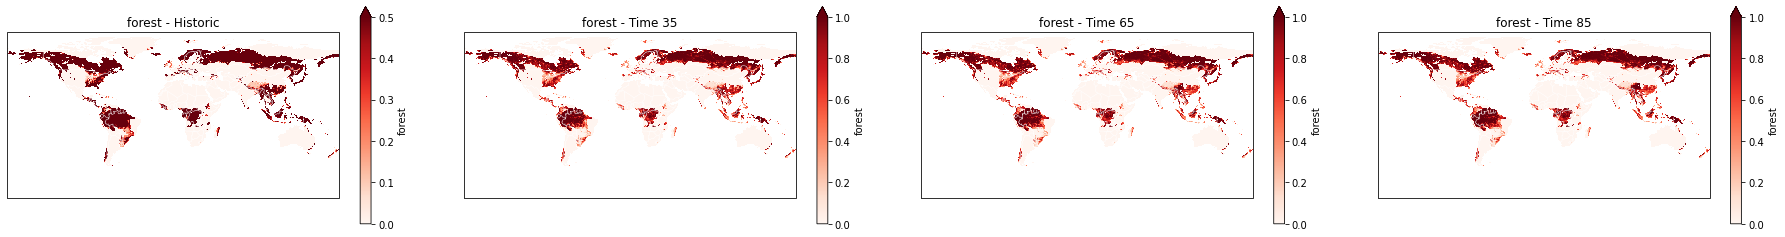

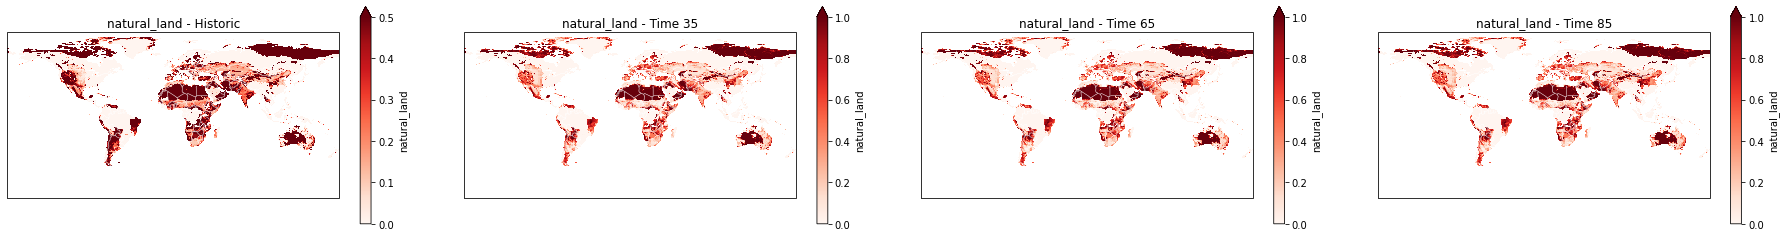

In [35]:
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import xarray as xr

# Future LUH2
LandUseList = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126.nc"
ncfname = LandUseList
da_landuse = xr.open_dataset(ncfname, decode_times=False)
da_landuse = da_landuse.isel(time=[35, 65, 85])

LUH_historic = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_historical.nc"
da_historic = xr.open_dataset(LUH_historic, decode_times=False)
da_historic = da_historic.isel(time=1146)

# Category mapping
category_mapping = {
    'cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'pasture': ['pastr', 'range'],
    'forest': ['primf', 'secdf'],
    'natural_land': ['primn', 'secdn']
}

# Create a new dataset for sum over categories
sum_over_categories = xr.Dataset()

# Sum the categories for both datasets
for category, vars_in_category in category_mapping.items():
    sum_over_categories[category] = sum(da_landuse[var] for var in vars_in_category)
    da_historic[category] = sum(da_historic[var] for var in vars_in_category)

# Time points for future dataset
time_points = [35, 65, 85]

# Plot each category on a lon-lat map
for category in sum_over_categories.data_vars:
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(32, 8), subplot_kw={'projection': ccrs.PlateCarree()})

    # Plot the historic data in the first column
    ax = axes[0]
    im = da_historic[category].plot.imshow(x='lon', y='lat', transform=ccrs.PlateCarree(), cmap='Reds', ax=ax, vmin=0, vmax=0.5, cbar_kwargs={'shrink': 0.5})
    ax.add_feature(cfeature.BORDERS, color='white', linewidth=0.5)
    ax.set_title(f"{category} - Historic")
    #ax.set_extent((-20, 60, -40, 40))

    # Plot future data for each selected time point in the remaining columns
    for i, time in enumerate(time_points):
        ax = axes[i+1]
        im = sum_over_categories[category].isel(time=i).plot.imshow(x='lon', y='lat', transform=ccrs.PlateCarree(), cmap='Reds', ax=ax, vmin=0, vmax=1, cbar_kwargs={'shrink': 0.5})
        ax.add_feature(cfeature.BORDERS, color='white', linewidth=0.5)
        ax.set_title(f"{category} - Time {time}")
        #ax.set_extent((-20, 60, -40, 40))

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.1)
    
    # Show the plot
    plt.show()


/storage/homefs/ch21o450/.local/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


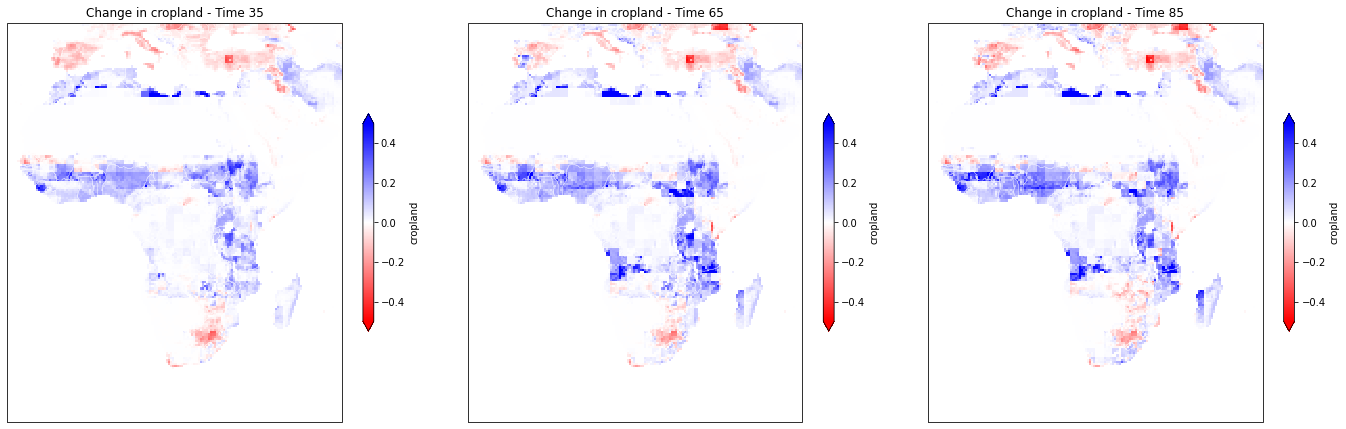

/storage/homefs/ch21o450/.local/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


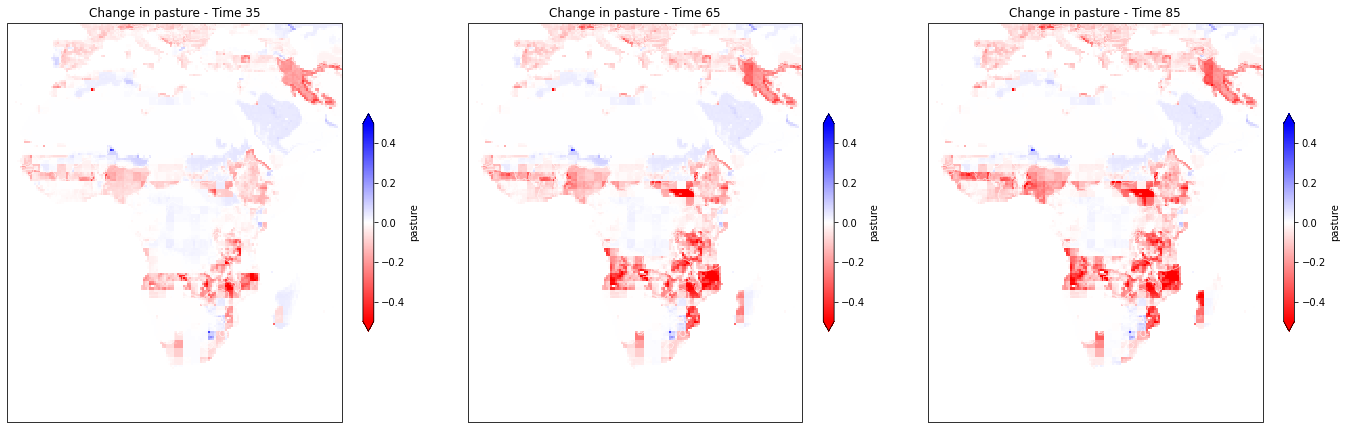

/storage/homefs/ch21o450/.local/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


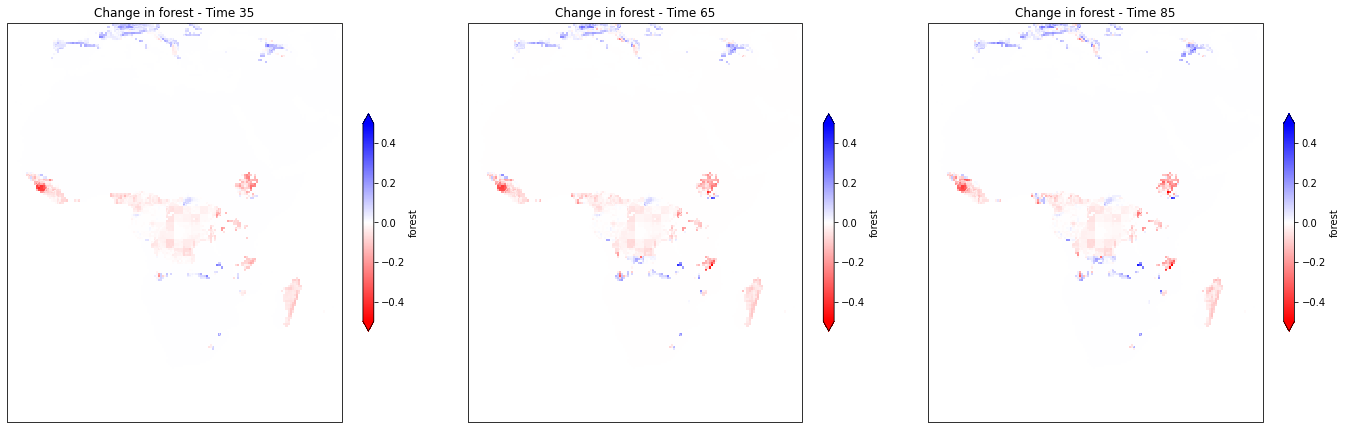

/storage/homefs/ch21o450/.local/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


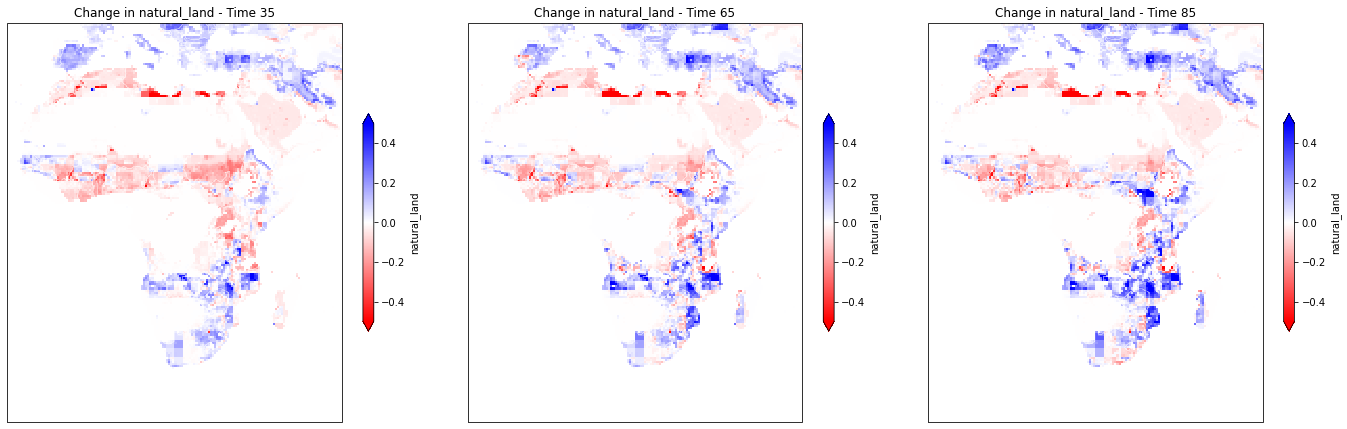

In [17]:
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import xarray as xr

# Future LUH2
LandUseList = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126.nc"
ncfname = LandUseList
da_landuse = xr.open_dataset(ncfname, decode_times=False)
da_landuse = da_landuse.isel(time=[35, 65, 85])

LUH_historic = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_historical.nc"
da_historic = xr.open_dataset(LUH_historic, decode_times=False)
da_historic = da_historic.isel(time=1146)

# Category mapping
category_mapping = {
    'cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'pasture': ['pastr', 'range'],
    'forest': ['primf', 'secdf'],
    'natural_land': ['primn', 'secdn']
}

# Create a new dataset for sum over categories
sum_over_categories = xr.Dataset()

# Sum the categories for both datasets
for category, vars_in_category in category_mapping.items():
    sum_over_categories[category] = sum(da_landuse[var] for var in vars_in_category)
    da_historic[category] = sum(da_historic[var] for var in vars_in_category)

# Time points for future dataset
time_points = [35, 65, 85]

# Plot each category on a lon-lat map
for category in sum_over_categories.data_vars:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Plot future data for each selected time point in the remaining columns
    for i, time in enumerate(time_points):
        ax = axes[i]
        # Compute the difference between the future and the historical data
        difference = sum_over_categories[category].isel(time=i) - da_historic[category]
        im = difference.plot.imshow(x='lon', y='lat', transform=ccrs.PlateCarree(), cmap='bwr_r', ax=ax, vmin=-0.5, vmax=0.5, cbar_kwargs={'shrink': 0.5})
        ax.add_feature(cfeature.BORDERS, color='white', linewidth=0.5)
        ax.set_title(f"Change in {category} - Time {time}")
        ax.set_extent((-20, 60, -40, 40))
    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.1)
    
    # Show the plot
    plt.show()


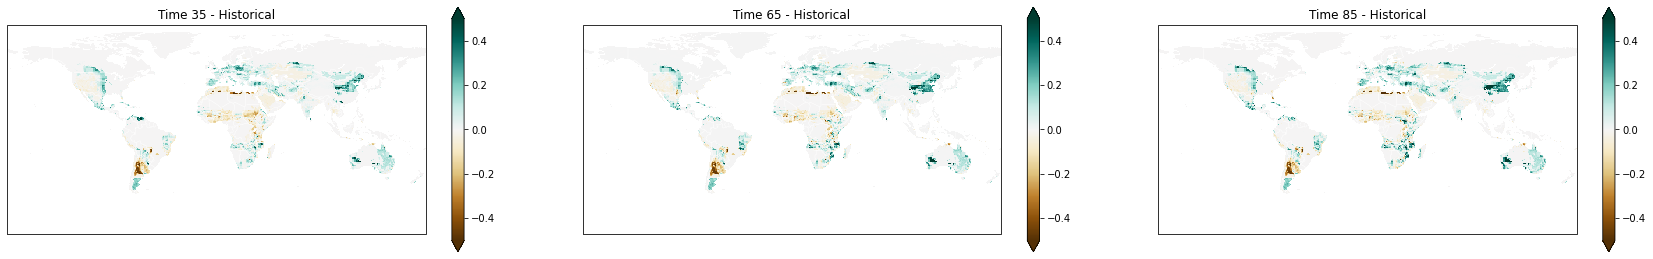

In [14]:
#Africa each variable future - 1995 
warnings.filterwarnings('ignore', category=UserWarning)
LandUseList = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126.nc"


ncfname = LandUseList
da_landuse = xr.open_dataset(ncfname, decode_times=False)
da_landuse = da_landuse.isel(time=[35, 65,85])

LUH_historic = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_historical.nc"

da_historic =  xr.open_dataset(LUH_historic, decode_times=False)
da_historic = da_historic.isel(time=1146)

fig, axes = plt.subplots(ncols=3, figsize=(30, 15), subplot_kw={'projection': ccrs.PlateCarree()})

for i, time in enumerate([35, 65, 85]):
    ax = axes[i]
    sum_ps = da_landuse["primn"].isel(time=i) + da_landuse["secdn"].isel(time=i)
    sum_his = da_historic["primn"] + da_historic["secdn"]
    diff = sum_ps - sum_his

    # Plot data
    im = diff.plot.imshow(x='lon', y='lat', transform=ccrs.PlateCarree(), cmap='BrBG', ax=ax, vmin=-0.5, vmax=0.5, cbar_kwargs={'shrink': 0.3})

    # Set map extent and add borders
    #ax.set_extent((-20, 60, -40, 40))
    ax.add_feature(cfeature.BORDERS, color='white', linewidth=0.5)

    # Title
    ax.set_title(f"Time {time} - Historical")

    # Remove x-axis and y-axis labels
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1)

# Show the plot
plt.show()



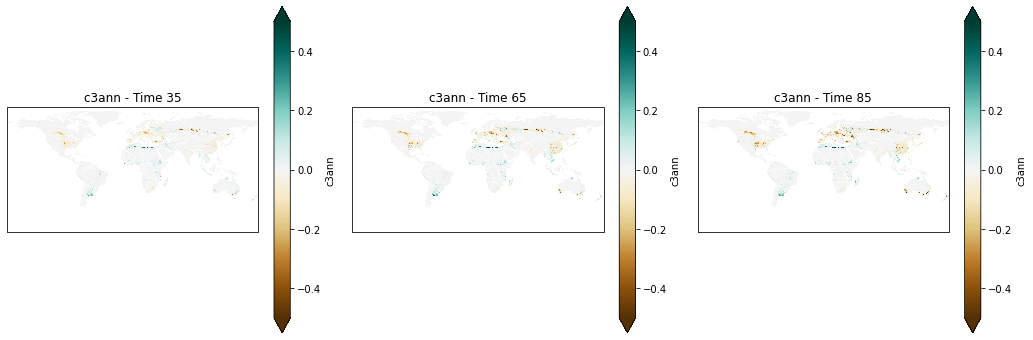

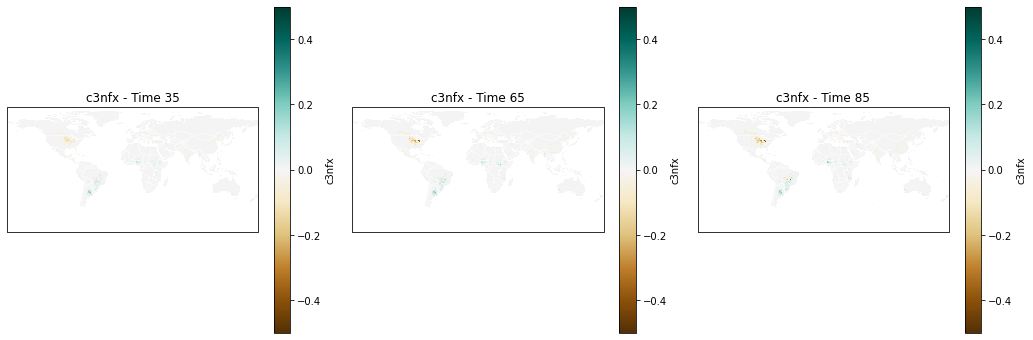

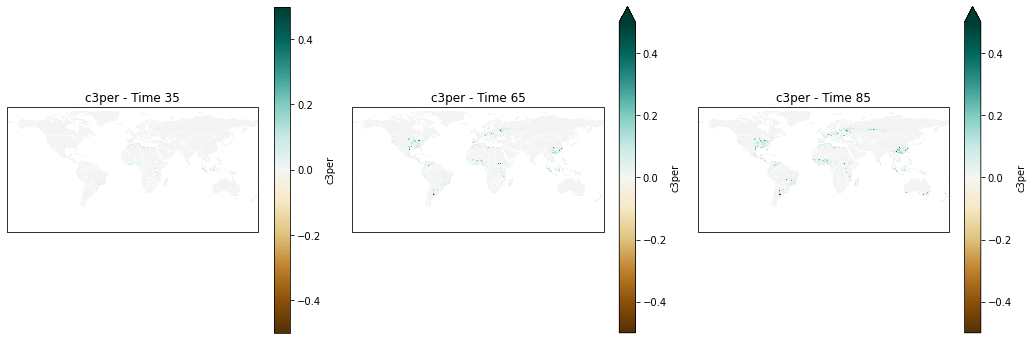

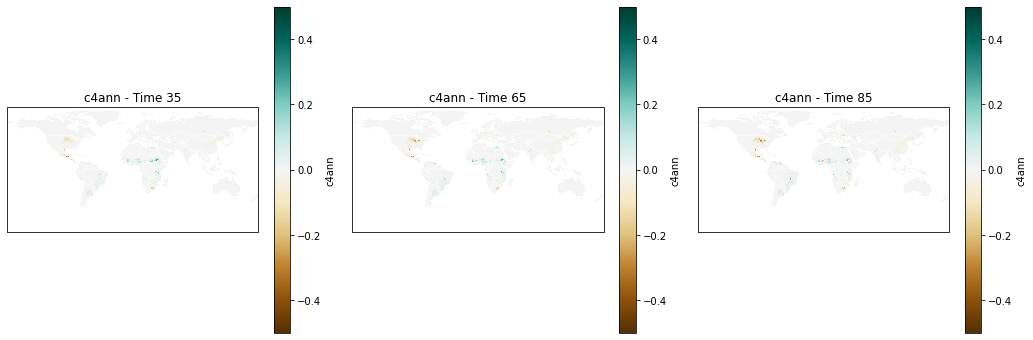

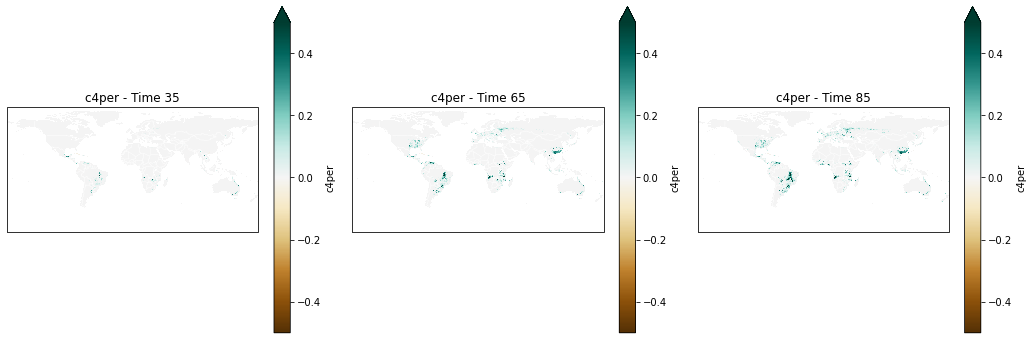

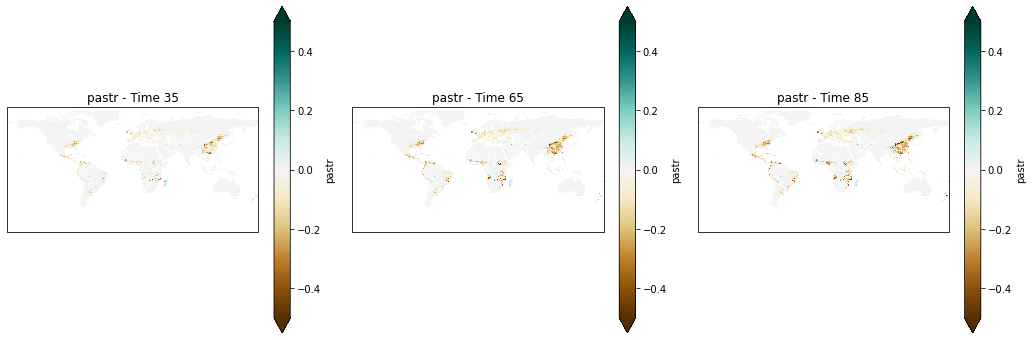

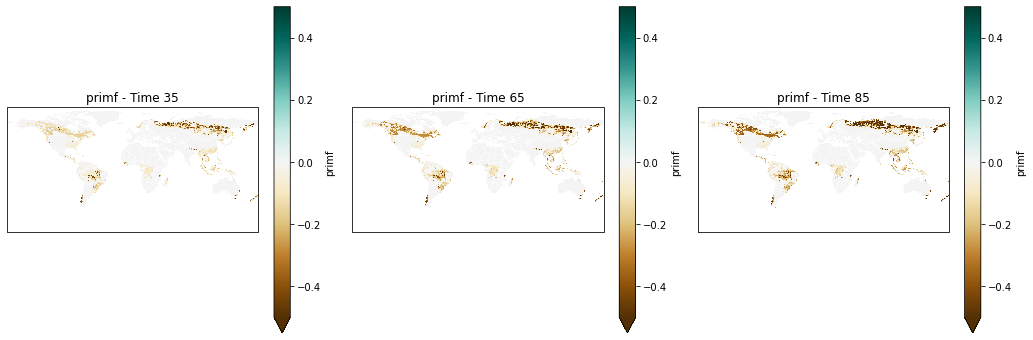

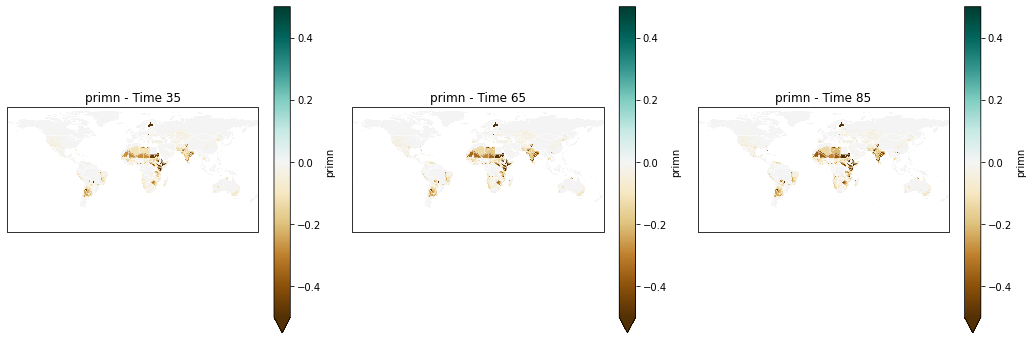

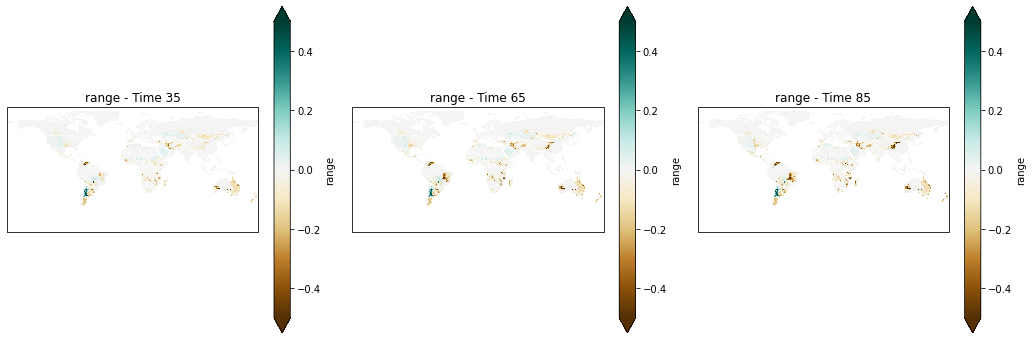

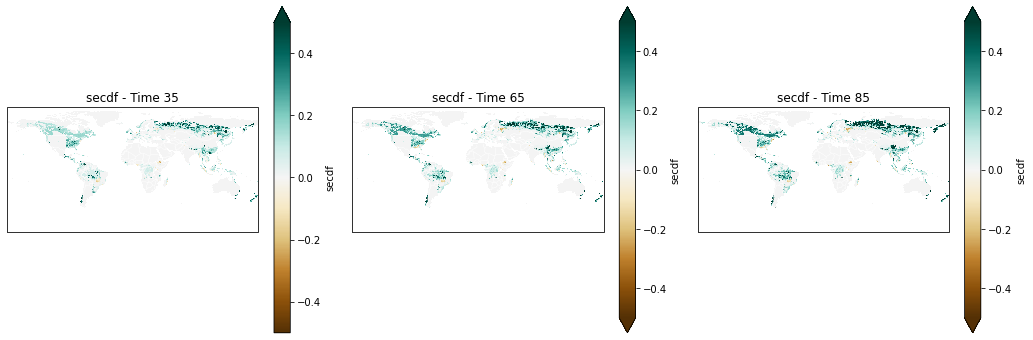

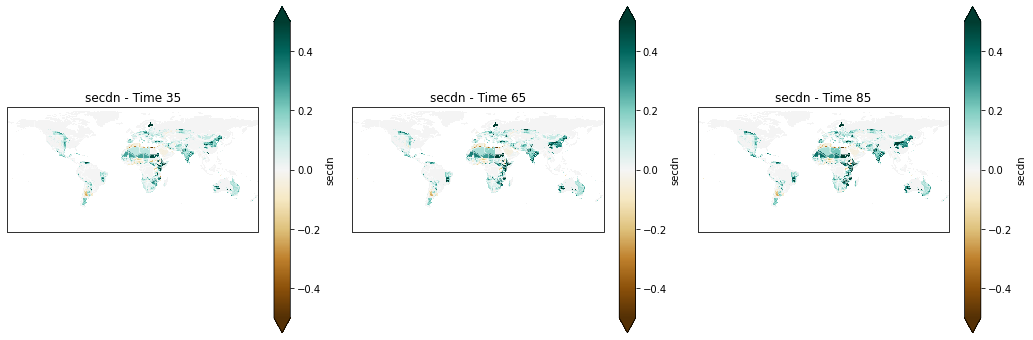

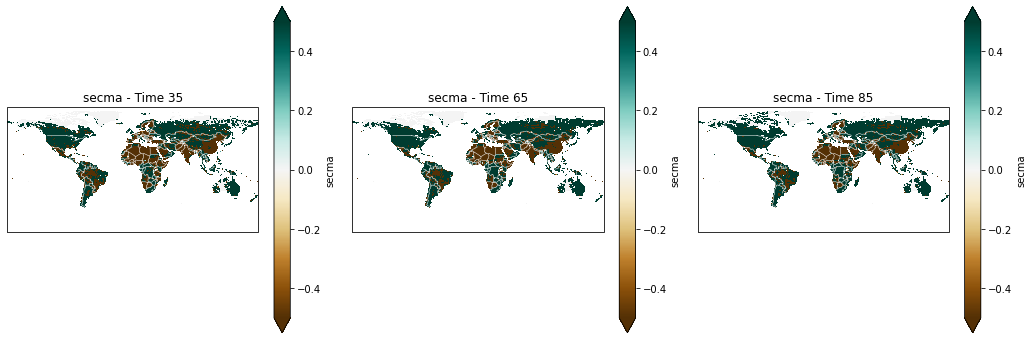

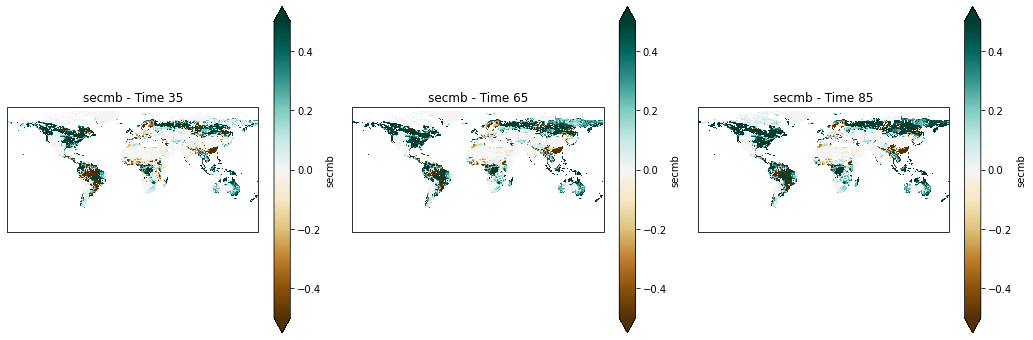

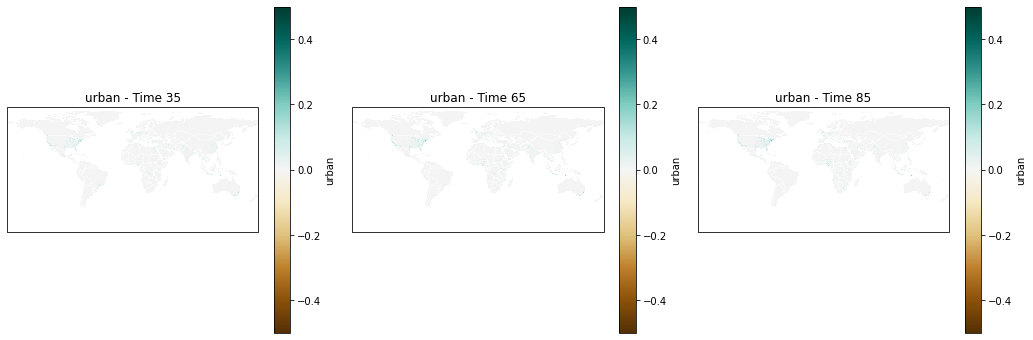

In [25]:
#Africa each variable future - 1995 
warnings.filterwarnings('ignore', category=UserWarning)
LandUseList = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126.nc"


ncfname = LandUseList
da_landuse = xr.open_dataset(ncfname, decode_times=False)
da_landuse = da_landuse.isel(time=[35, 65,85])

LUH_historic = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_historical.nc"

da_historic =  xr.open_dataset(LUH_historic, decode_times=False)
da_historic = da_historic.isel(time=1146)

# Create a list of variable names excluding 'time_bnds'
variables = [var for var in da_landuse.data_vars if var != 'time_bnds']

# Plot each variable on a lon-lat map
for var in variables:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    
    for i, time in enumerate([35, 65, 85]):
        ax = axes[i]
        # Compute the difference between da_landuse and da_historic
        diff = da_landuse[var].isel(time=i) - da_historic[var]
        
        # Plot data
        im = diff.plot.imshow(x='lon', y='lat', transform=ccrs.PlateCarree(), cmap='BrBG', ax=ax, vmin=-0.5, vmax=0.5)
        
        # Set map extent and add borders
        #ax.set_extent((-20, 60, -40, 40))
        ax.add_feature(cfeature.BORDERS, color='white', linewidth=0.5)
        
        # Title
        ax.set_title(f"{var} - Time {time}")
    
    # Colorbar
    
    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.1)
    
    # Show the plot
    plt.show()

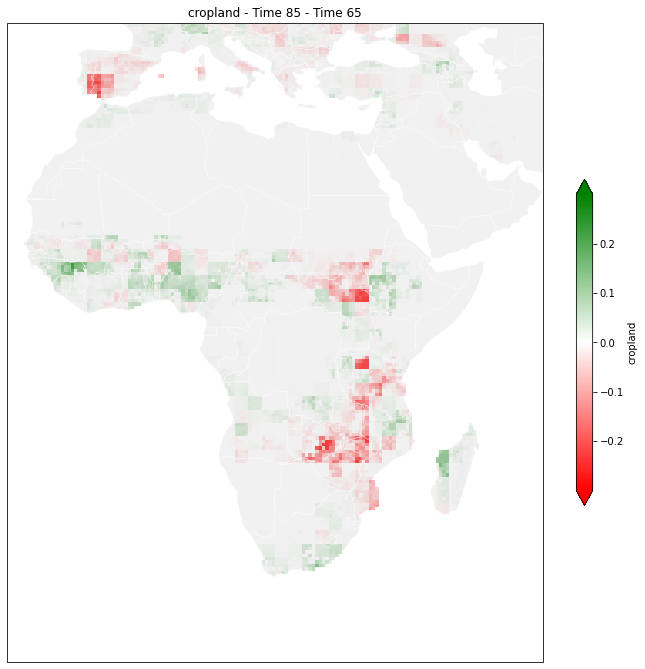

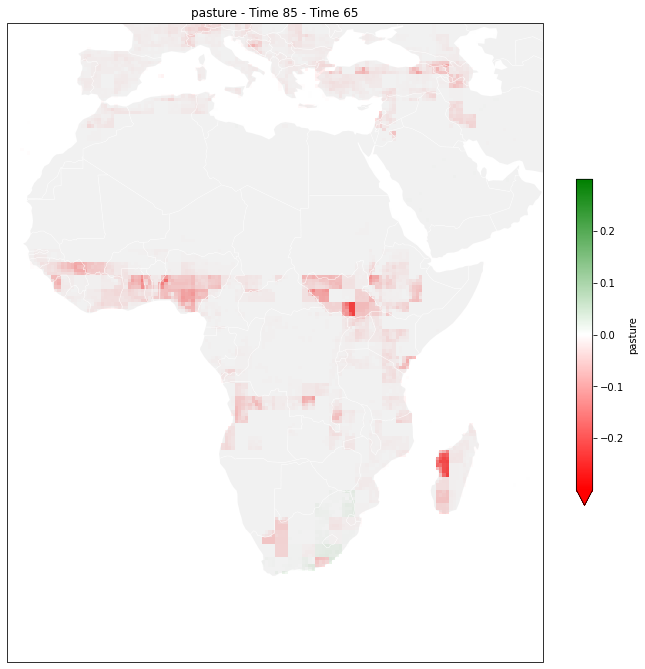

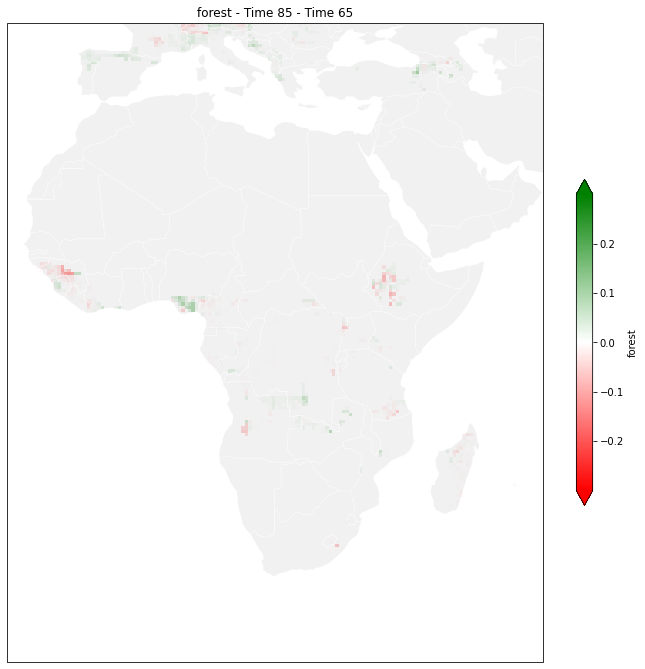

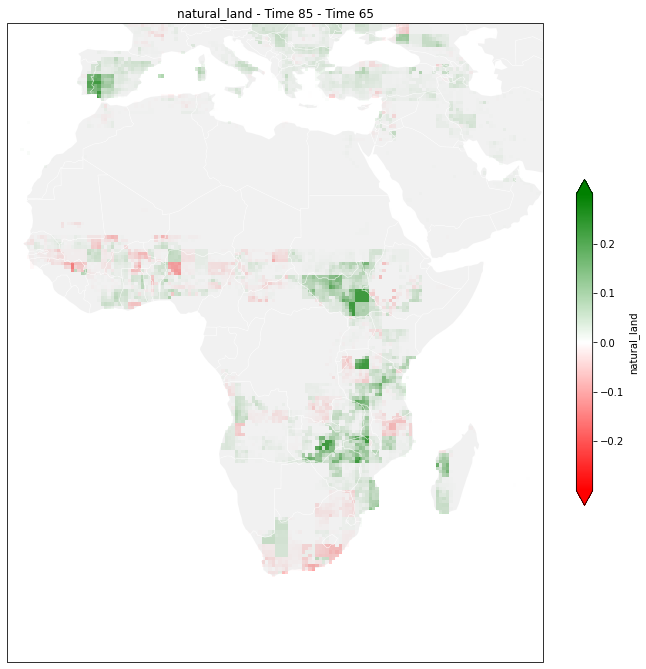

In [22]:
import warnings
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

warnings.filterwarnings('ignore', category=UserWarning)
LandUseList = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126.nc"

ncfname = LandUseList
da_landuse = xr.open_dataset(ncfname, decode_times=False)
da_landuse = da_landuse.isel(time=[35, 65, 85])

LUH_historic = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_historical.nc"

da_historic = xr.open_dataset(LUH_historic, decode_times=False)
da_historic = da_historic.isel(time=1146)

# Category mapping
category_mapping = {
    'cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'pasture': ['pastr', 'range'],
    'forest': ['primf', 'secdf'],
    'natural_land': ['primn', 'secdn']
}

# Create a new dataset for sum over categories
sum_over_categories = xr.Dataset()

# Sum the categories for both datasets
for category, vars_in_category in category_mapping.items():
    sum_over_categories[category] = sum(da_landuse[var] for var in vars_in_category)

# Define a colormap with a white midpoint
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","white","green"])

# Normalize the colormap so that 0 maps to the midpoint
norm = matplotlib.colors.TwoSlopeNorm(vmin=-0.3, vcenter=0, vmax=0.3)

# Plot the difference between the third and the second column for each category
for category in sum_over_categories.data_vars:
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})

    # Compute the difference between the third and the second column
    diff = sum_over_categories[category].isel(time=2) - sum_over_categories[category].isel(time=1)
    countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    # Plot data
    im = diff.plot.imshow(x='lon', y='lat', transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, ax=axes, cbar_kwargs={'shrink': 0.5})
    countries.plot(ax=axes, color="lightgray", zorder=1, alpha=0.3)
    # Set map extent and add borders
    axes.set_extent((-20, 60, -40, 40))
    axes.add_feature(cfeature.BORDERS, color='white', linewidth=0.5)

    # Title
    axes.set_title(f"{category} - Time 85 - Time 65")

    # Show the plot
    plt.show()


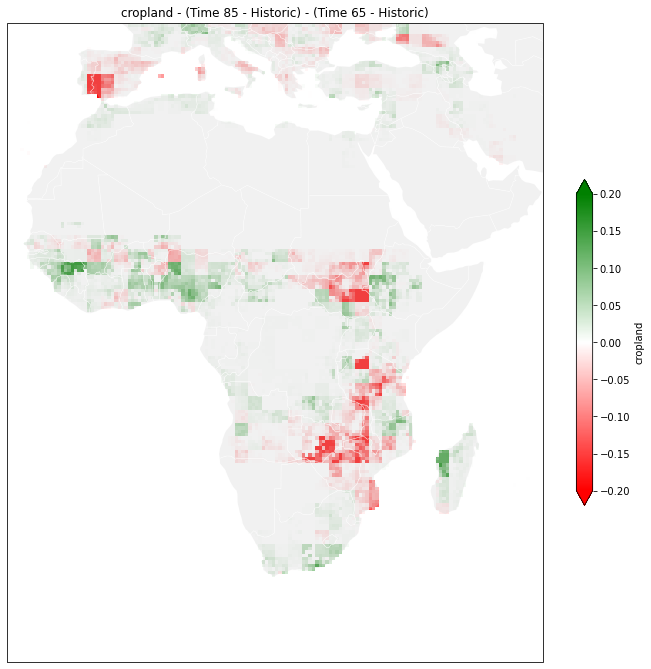

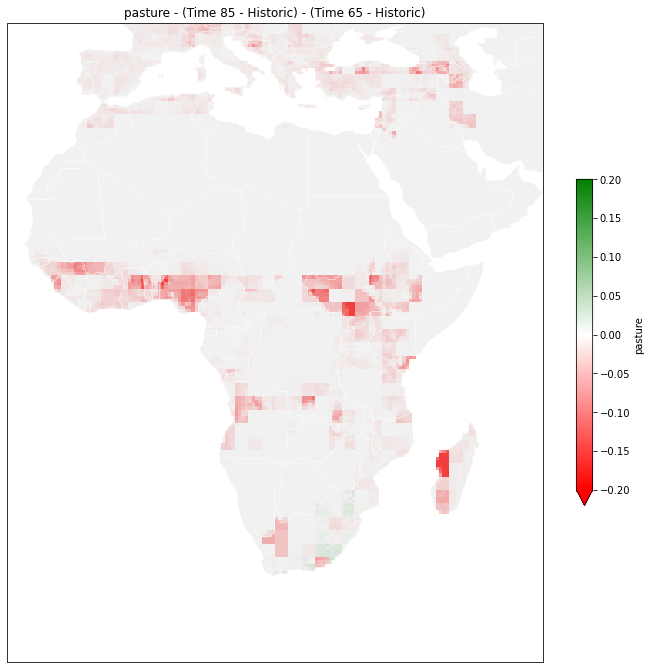

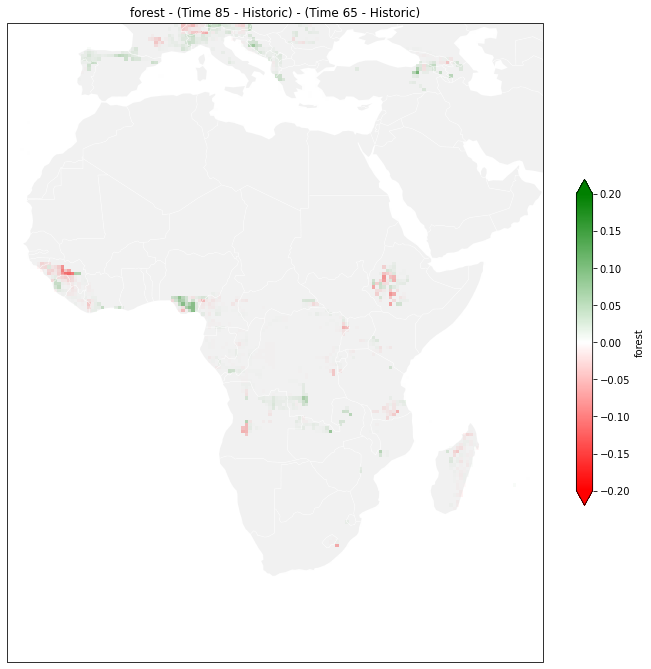

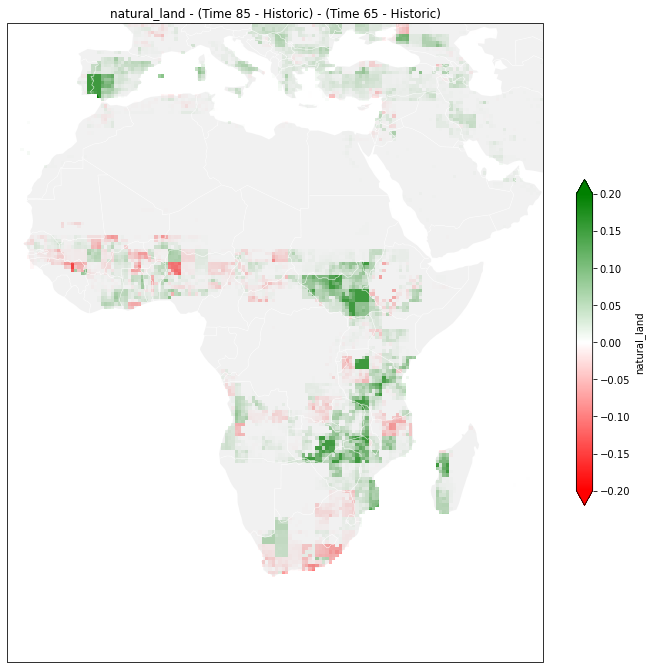

In [30]:
import warnings
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

warnings.filterwarnings('ignore', category=UserWarning)
LandUseList = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126.nc"

ncfname = LandUseList
da_landuse = xr.open_dataset(ncfname, decode_times=False)
da_landuse = da_landuse.isel(time=[35, 65, 85])

LUH_historic = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_historical.nc"

da_historic = xr.open_dataset(LUH_historic, decode_times=False)
da_historic = da_historic.isel(time=1146)

# Category mapping
category_mapping = {
    'cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'pasture': ['pastr', 'range'],
    'forest': ['primf', 'secdf'],
    'natural_land': ['primn', 'secdn']
}

# Create a new dataset for sum over categories
sum_over_categories_landuse = xr.Dataset()
sum_over_categories_historic = xr.Dataset()

# Sum the categories for both datasets
for category, vars_in_category in category_mapping.items():
    sum_over_categories_landuse[category] = sum(da_landuse[var] for var in vars_in_category)
    sum_over_categories_historic[category] = sum(da_historic[var] for var in vars_in_category)

# Define a colormap with a white midpoint
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","white","green"])

# Normalize the colormap so that 0 maps to the midpoint
norm = matplotlib.colors.TwoSlopeNorm(vmin=-0.2, vcenter=0, vmax=0.2)

# Plot (85 - historic) - (65 - historic) for each category
for category in sum_over_categories_landuse.data_vars:
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})

    # Compute the difference (85 - historic) - (65 - historic)
    diff = (sum_over_categories_landuse[category].isel(time=2) - sum_over_categories_historic[category]) - (sum_over_categories_landuse[category].isel(time=1) - sum_over_categories_historic[category])
    countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

    # Plot data
    im = diff.plot.imshow(x='lon', y='lat', transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, ax=axes, cbar_kwargs={'shrink': 0.5})
   
    countries.plot(ax=axes, color="lightgray", zorder=1, alpha=0.3)
    # Set map extent and add borders
    axes.set_extent((-20, 60, -40, 40))
    axes.add_feature(cfeature.BORDERS, color='white', linewidth=0.5)

    # Title
    axes.set_title(f"{category} - (Time 85 - Historic) - (Time 65 - Historic)")

    # Show the plot
    plt.show


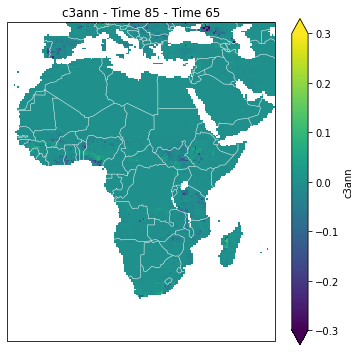

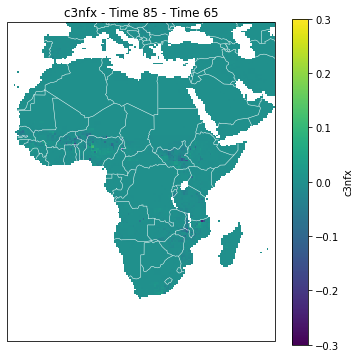

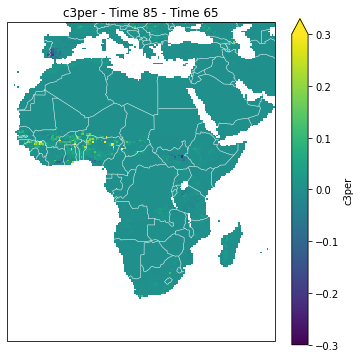

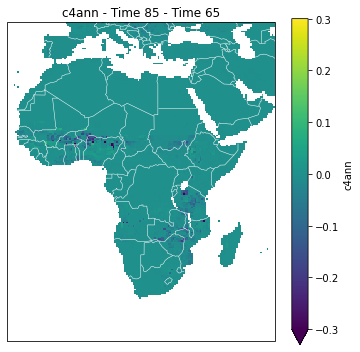

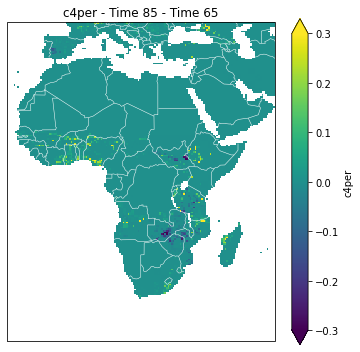

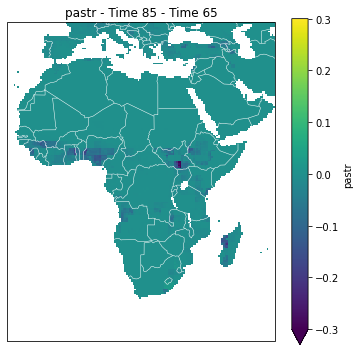

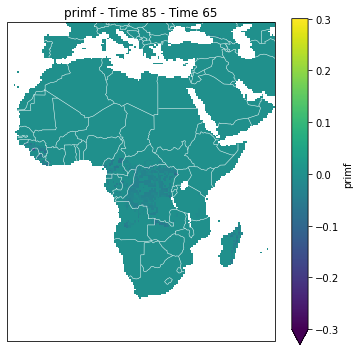

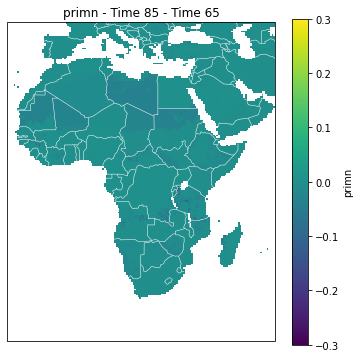

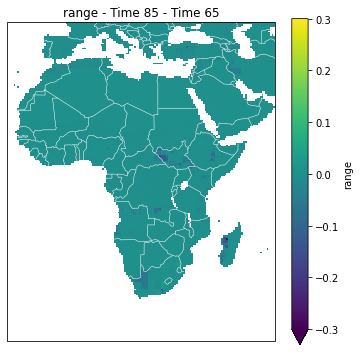

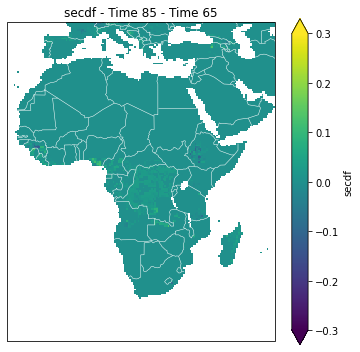

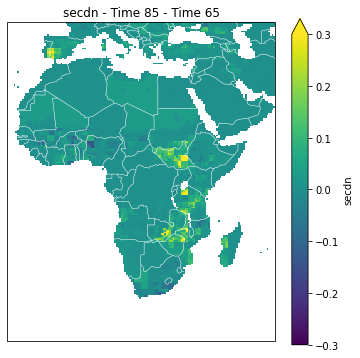

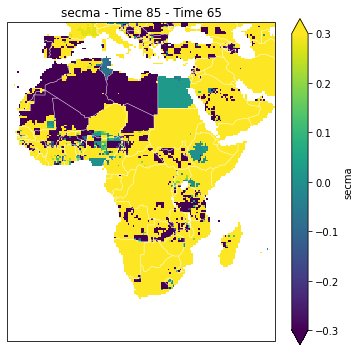

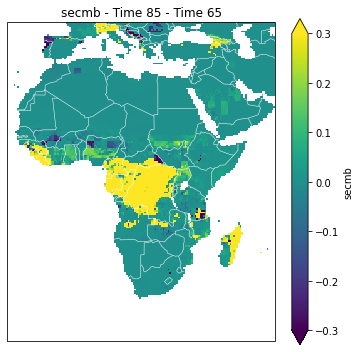

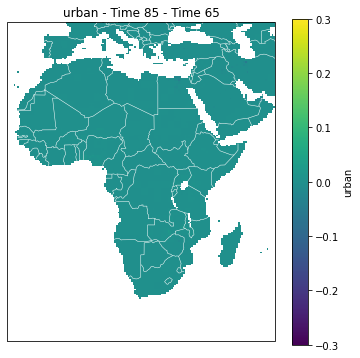

In [16]:
import warnings
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

warnings.filterwarnings('ignore', category=UserWarning)
LandUseList = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126.nc"

ncfname = LandUseList
da_landuse = xr.open_dataset(ncfname, decode_times=False)
da_landuse = da_landuse.isel(time=[35, 65, 85])

LUH_historic = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_historical.nc"

da_historic = xr.open_dataset(LUH_historic, decode_times=False)
da_historic = da_historic.isel(time=1146)

# Create a list of variable names excluding 'time_bnds'
variables = [var for var in da_landuse.data_vars if var != 'time_bnds']

# Plot the difference between the third and the second column for each variable
for var in variables:
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), subplot_kw={'projection': ccrs.PlateCarree()})

    # Compute the difference between da_landuse and da_historic
    diff = da_landuse[var].isel(time=2) - da_landuse[var].isel(time=1)

    # Plot data
    im = diff.plot.imshow(x='lon', y='lat', transform=ccrs.PlateCarree(), cmap='viridis', ax=axes, vmin=-0.3, vmax=0.3)

    # Set map extent and add borders
    axes.set_extent((-20, 60, -40, 40))
    axes.add_feature(cfeature.BORDERS, color='white', linewidth=0.5)

    # Title
    axes.set_title(f"{var} - Time 85 - Time 65")

    # Colorbar
    #cbar = plt.colorbar(im, ax=axes, orientation='horizontal', pad=0.05)
    #cbar.set_label('Difference')

    # Show the plot
    plt.show()


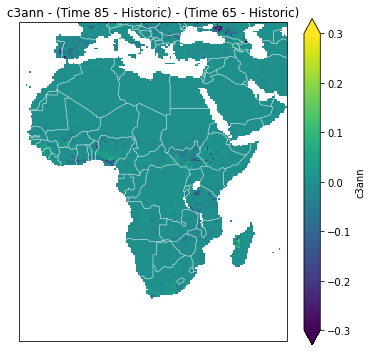

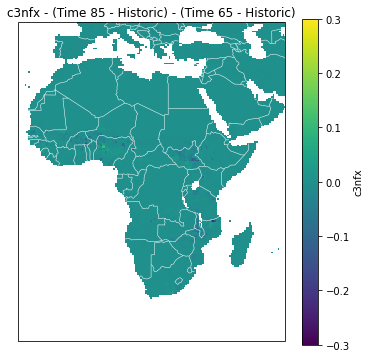

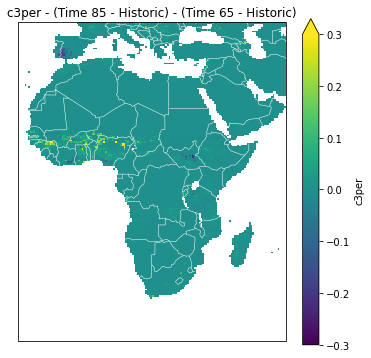

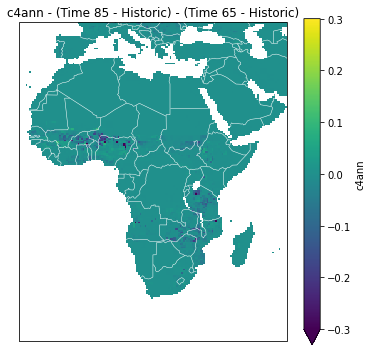

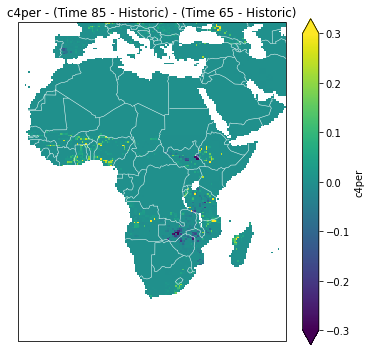

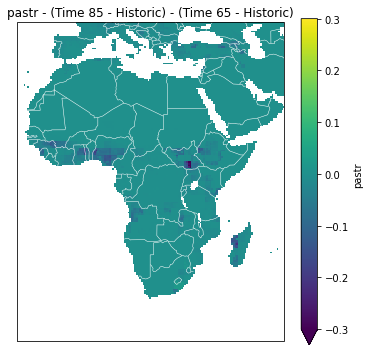

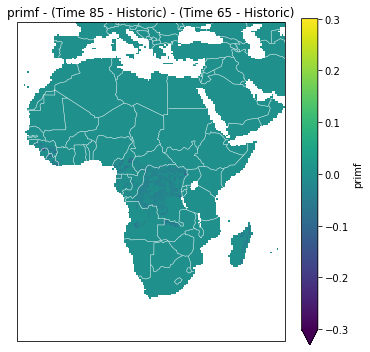

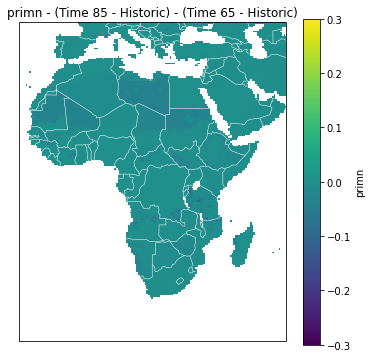

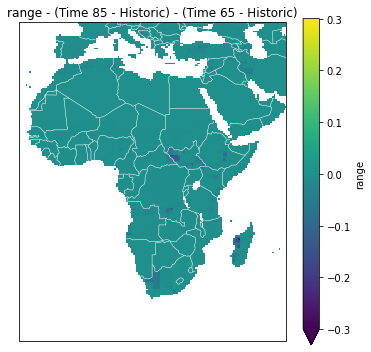

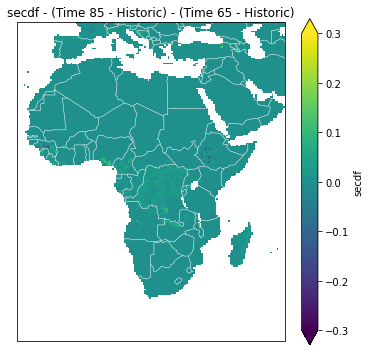

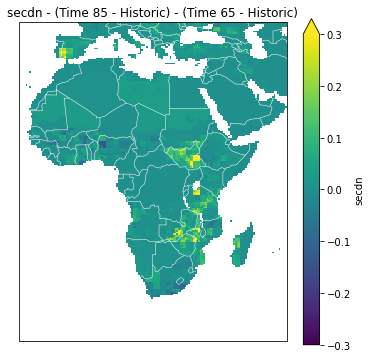

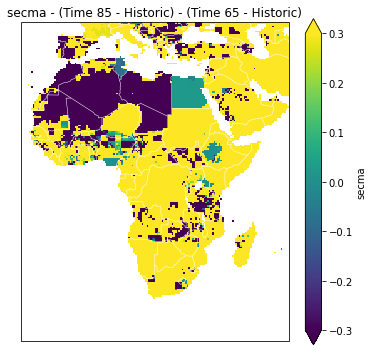

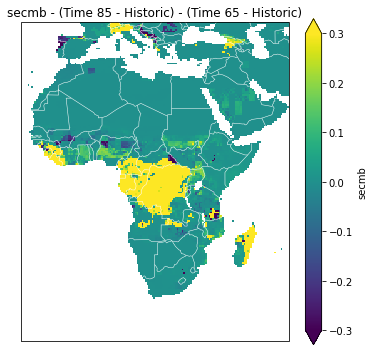

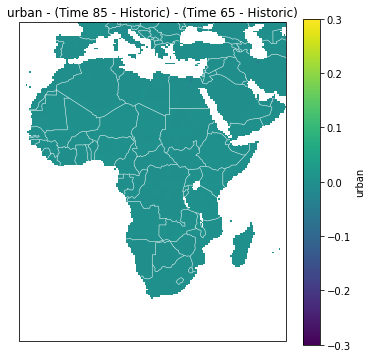

In [23]:
import warnings
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

warnings.filterwarnings('ignore', category=UserWarning)
LandUseList = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126.nc"

ncfname = LandUseList
da_landuse = xr.open_dataset(ncfname, decode_times=False)
da_landuse = da_landuse.isel(time=[35, 65, 85])

LUH_historic = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_historical.nc"

da_historic = xr.open_dataset(LUH_historic, decode_times=False)
da_historic = da_historic.isel(time=1146)

# Create a list of variable names excluding 'time_bnds'
variables = [var for var in da_landuse.data_vars if var != 'time_bnds']

# Plot (85 - historic) - (65 - historic) for each variable
for var in variables:
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), subplot_kw={'projection': ccrs.PlateCarree()})

    # Compute the difference (85 - historic) - (65 - historic)
    diff = (da_landuse[var].isel(time=2) - da_historic[var]) - (da_landuse[var].isel(time=1) - da_historic[var])

    # Plot data
    im = diff.plot.imshow(x='lon', y='lat', transform=ccrs.PlateCarree(), cmap='viridis', ax=axes, vmin=-0.3, vmax=0.3)

    # Set map extent and add borders
    axes.set_extent((-20, 60, -40, 40))
    axes.add_feature(cfeature.BORDERS, color='white', linewidth=0.5)

    # Title
    axes.set_title(f"{var} - (Time 85 - Historic) - (Time 65 - Historic)")

    # Colorbar
    #cbar = plt.colorbar(im, ax=axes, orientation='horizontal', pad=0.05)
    #cbar.set_label('Difference')

    # Show the plot
    plt.show()
